# INTRO TO THE PROJECT

In [81]:
#Download libraries
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install scikit-multilearn
!pip install plotly
!pip install nba_api
!pip install py-stringmatching
!pip install setuptools==58.0.4
!pip install py-stringsimjoin
!pip install torch


# Importing libraries and packages

In [170]:

#  git lfs track "*.csv" 
# git lfs track "notebooks/database.db"

import os
import glob
import sqlite3
import zipfile

import sqlite3 as sql
#Data Wrangling

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import joblib

# Linear Models
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

#Trees
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, \
    ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# SVM
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# dimensionality reduction
from sklearn.decomposition import PCA, KernelPCA

#Preprocessing Packages
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Model tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, recall_score, classification_report, precision_score, \
    roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Aditonal Data Sources
from nba_api.stats.endpoints import TeamInfoCommon
from nba_api.stats.static import teams

#Record Linking
import py_stringmatching as sm
import py_stringsimjoin as ssj

# deep learning
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from pandas import SparseDtype
from scipy.sparse import csr_matrix
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Loading Data Sets
- Load NBA teams information
- Load NBA Shots from 2003-2024 seasons
- Load NBA players information

In [83]:
# Path to your zip file
current_dir = os.getcwd()
zip_file_path = current_dir + '/../raw-data/nba-shots.zip'
# list to store dataframes from CSV
csv_dataframes = []
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # Loop through each file in the zip
    for file_name in zip_file.namelist():
        # Check if the file is a CSV
        if file_name.endswith('.csv'):
            # Read the CSV file into a DataFrame
            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                csv_dataframes.append(df)  # Store the DataFrame in the dictionary
                print(file_name)

# Now, `csv_dataframes` contains DataFrames for each CSV file
df = pd.concat(csv_dataframes)
df.head()

NBA_2004_Shots.csv
NBA_2005_Shots.csv
NBA_2006_Shots.csv
NBA_2007_Shots.csv
NBA_2008_Shots.csv
NBA_2009_Shots.csv
NBA_2010_Shots.csv
NBA_2011_Shots.csv
NBA_2012_Shots.csv
NBA_2013_Shots.csv
NBA_2014_Shots.csv
NBA_2015_Shots.csv
NBA_2016_Shots.csv
NBA_2017_Shots.csv
NBA_2018_Shots.csv
NBA_2019_Shots.csv
NBA_2020_Shots.csv
NBA_2021_Shots.csv
NBA_2022_Shots.csv
NBA_2023_Shots.csv
NBA_2024_Shots.csv


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.3,24.45,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Right Side,R,16-24 ft.,-15.8,7.85,16,6,0,55


In [84]:
nba_teams_file = current_dir + "/../raw-data/nba-teams.csv"
if not os.path.exists(nba_teams_file):
    print("File is not present, we use an NBA API Fetch Call")
    nba_teams = teams.get_teams()
    # Create a dictionary of team IDs
    team_ids_dict = {team['full_name']: team['id'] for team in nba_teams}
    # Create an empty DataFrame to store the data
    df_teams = pd.DataFrame()
    # Loop through the teams and append to the df
    for team_name, team_id in team_ids_dict.items():
        team_info = TeamInfoCommon(team_id=team_id)
        df_team = team_info.get_data_frames()[0]
        df_team['TeamName'] = team_name  # Adding the team name to the DataFrame
        df_teams = pd.concat([df_teams, df_team], ignore_index=True)
    # Print the combined DataFrame
else:
    print("File is present")
    df_teams = pd.read_csv(nba_teams_file)
df_teams

File is present


,TEAM_ID,SEASON_YEAR,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CONFERENCE,TEAM_DIVISION,TEAM_CODE,TEAM_SLUG,W,L,PCT,CONF_RANK,DIV_RANK,MIN_YEAR,MAX_YEAR,TeamName
0,1610612737,2024-25,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,7,8,0.467,5,2,1949,2024,Atlanta Hawks
1,1610612738,2024-25,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,11,3,0.786,2,1,1946,2024,Boston Celtics
2,1610612739,2024-25,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,15,0,1.000,1,1,1970,2024,Cleveland Cavaliers
3,1610612740,2024-25,New Orleans,Pelicans,NOP,West,Southwest,pelicans,pelicans,4,10,0.286,14,5,2002,2024,New Orleans Pelicans
4,1610612741,2024-25,Chicago,Bulls,CHI,East,Central,bulls,bulls,6,9,0.400,9,4,1966,2024,Chicago Bulls
5,1610612742,2024-25,Dallas,Mavericks,DAL,West,Southwest,mavericks,mavericks,7,7,0.500,11,3,1980,2024,Dallas Mavericks
6,1610612743,2024-25,Denver,Nuggets,DEN,West,Northwest,nuggets,nuggets,7,5,0.583,6,2,1976,2024,Denver Nuggets
7,1610612744,2024-25,Golden State,Warriors,GSW,West,Pacific,warriors,warriors,10,3,0.769,2,1,1946,2024,Golden State Warriors
8,1610612745,2024-25,Houston,Rockets,HOU,West,Southwest,rockets,rockets,10,5,0.667,4,1,1967,2024,Houston Rockets
9,1610612746,2024-25,LA,Clippers,LAC,West,Pacific,clippers,clippers,8,7,0.533,9,4,1970,2024,Los Angeles Clippers


In [85]:
current_dir = os.getcwd()
dir_path = current_dir + '/../raw-data/'
df_players = pd.read_csv(dir_path + "common_player_info.csv")
df_players.head()

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,...,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N


# Data Dictionary

**Self-Explanatory**: **TEAM_NAME**, **PLAYER_NAME**, **POSITION_GROUP**, **POSITION**, **HOME_TEAM**, **AWAY_TEAM**

- **SEASON_1** & **SEASON_2**: Season indicator variables  
- **TEAM_ID**: NBA's unique ID variable of that specific team in their API  
- **PLAYER_ID**: NBA's unique ID variable of that specific player in their API  
- **GAME_DATE**: Date of the game (M-D-Y // Month-Date-Year)  
- **GAME_ID**: NBA's unique ID variable of that specific game in their API  
- **EVENT_TYPE**: Character variable denoting a shot outcome (Made Shot // Missed Shot)  
- **SHOT_MADE**: True/False variable denoting a shot outcome (True // False)  
- **ACTION_TYPE**: Description of shot type (layup, dunk, jump shot, etc.)  
- **SHOT_TYPE**: Type of shot (2PT or 3PT)  
- **BASIC_ZONE**: Name of the court zone the shot took place in  
  - Restricted Area, In the Paint (non-RA), Midrange, Left Corner 3, Right Corner 3, Above the Break, Backcourt  
- **ZONE_NAME**: Name of the side of court the shot took place in  
  - left, left side center, center, right side center, right  
- **ZONE_ABB**: Abbreviation of the side of court  
  - (L), (LC), (C), (RC), (R)  
- **ZONE_RANGE**: Distance range of shot by zones  
  - Less than 8 ft., 8-16 ft. 16-24 ft. 24+ ft.  
- **LOC_X**: X coordinate of the shot in the x, y plane of the court (0, 50)  
- **LOC_Y**: Y coordinate of the shot in the x, y plane of the court (0, 50)  
- **SHOT_DISTANCE**: Distance of the shot with respect to the center of the hoop, in feet  
- **QUARTER**: Quarter of the game  
- **MINS_LEFT**: Minutes remaining in the quarter  
- **SECS_LEFT**: Seconds remaining in minute of the quarter  


# DATA Cleaning, Wrangling and Record Linking

In [86]:
df["ACTION_TYPE"].unique()

array(['Jump Shot', 'Driving Layup Shot', 'Dunk Shot',
       'Alley Oop Dunk Shot', 'Fadeaway Jump Shot',
       'Driving Finger Roll Shot', 'Layup Shot', 'Tip Shot',
       'Slam Dunk Shot', 'Running Hook Shot', 'Turnaround Jump Shot',
       'Running Layup Shot', 'Jump Bank Shot', 'Running Jump Shot',
       'Jump Hook Shot', 'Reverse Layup Shot', 'Driving Dunk Shot',
       'Hook Shot', 'Reverse Dunk Shot', 'Running Finger Roll Shot',
       'Turnaround Hook Shot', 'Alley Oop Layup shot',
       'Follow Up Dunk Shot', 'Driving Hook Shot', 'Running Dunk Shot',
       'Finger Roll Shot', 'Hook Bank Shot',
       'Turnaround Finger Roll Shot', 'Running Tip Shot',
       'Turnaround Fadeaway shot', 'Driving Slam Dunk Shot',
       'Step Back Jump shot', 'Pullup Jump shot', 'Running Bank shot',
       'Driving Finger Roll Layup Shot', 'Finger Roll Layup Shot',
       'Pullup Bank shot', 'Putback Dunk Shot', 'Floating Jump shot',
       'Putback Layup Shot', 'Jump Bank Hook Shot',
      

In [87]:
# inspect the Leagues data set
print("Number of duplicate rows: " + str(df.duplicated().sum()))
print("dtypes:")
print(df.dtypes)
print("----------------------------\nLeagues DF describe:")
print(df.describe())
print("----------------------------\nCheck for Null values:")
print(df.isna().sum())
print("----------------------------\nFirst 5 rows of the dataset")
df.head()

Number of duplicate rows: 192
dtypes:
SEASON_1            int64
SEASON_2           object
TEAM_ID             int64
TEAM_NAME          object
PLAYER_ID           int64
PLAYER_NAME        object
POSITION_GROUP     object
POSITION           object
GAME_DATE          object
GAME_ID             int64
HOME_TEAM          object
AWAY_TEAM          object
EVENT_TYPE         object
SHOT_MADE            bool
ACTION_TYPE        object
SHOT_TYPE          object
BASIC_ZONE         object
ZONE_NAME          object
ZONE_ABB           object
ZONE_RANGE         object
LOC_X             float64
LOC_Y             float64
SHOT_DISTANCE       int64
QUARTER             int64
MINS_LEFT           int64
SECS_LEFT           int64
dtype: object
----------------------------
Leagues DF describe:
           SEASON_1       TEAM_ID     PLAYER_ID       GAME_ID         LOC_X  \
count  4.231262e+06  4.231262e+06  4.231262e+06  4.231262e+06  4.231262e+06   
mean   2.014191e+03  1.610613e+09  4.136611e+05  2.131969e+07  9

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.3,24.45,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Right Side,R,16-24 ft.,-15.8,7.85,16,6,0,55


In [88]:
df_shots_clean = df.drop_duplicates()
df_shots_clean.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.3,24.45,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Right Side,R,16-24 ft.,-15.8,7.85,16,6,0,55


In [89]:
df_shots_clean = df_shots_clean[df_shots_clean["ACTION_TYPE"] != "No Shot"]
# Drop NA records
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean = df_shots_clean.dropna()
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean[df_shots_clean["POSITION_GROUP"].isna() | df_shots_clean["POSITION"].isna()]

Number of rows containing NA values:
POSITION_GROUP    7930
POSITION          7930
dtype: int64
Number of rows containing NA values:
Series([], dtype: int64)


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT


# Keep Only current 30 nba teams and get the respective conference for each team

In [90]:
# Keep only current NBA teams
nba_teams = df_shots_clean[df_shots_clean["SEASON_1"] == 2024].TEAM_NAME.unique()
df_shots_clean = df_shots_clean[df_shots_clean["TEAM_NAME"].isin(nba_teams)]
print(sorted(df_shots_clean.TEAM_NAME.unique()) == sorted(df_teams.TeamName))
# merge on team abbreviation 
df_shots_clean = df_shots_clean.merge(df_teams[['TeamName', 'TEAM_CONFERENCE', "TEAM_ABBREVIATION"]],
                                      left_on='TEAM_NAME', right_on='TeamName', how='inner')
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean = df_shots_clean.dropna()
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean.head()

False
Number of rows containing NA values:
Series([], dtype: int64)
Number of rows containing NA values:
Series([], dtype: int64)


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,TeamName,TEAM_CONFERENCE,TEAM_ABBREVIATION
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,24+ ft.,20.0,21.35,25,6,0,0,Los Angeles Lakers,West,LAL
1,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,16-24 ft.,13.3,24.45,23,6,0,9,Los Angeles Lakers,West,LAL
2,2004,2003-04,1610612747,Los Angeles Lakers,2567,Brian Cook,C,C,04-14-2004,20301187,...,Less Than 8 ft.,-0.0,5.25,0,6,1,12,Los Angeles Lakers,West,LAL
3,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,24+ ft.,-1.5,29.95,24,6,1,42,Los Angeles Lakers,West,LAL
4,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,16-24 ft.,-14.6,16.75,18,6,2,27,Los Angeles Lakers,West,LAL


In [91]:
print(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "East"]["TEAM_NAME"].unique())
print(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "West"]["TEAM_NAME"].unique())
# Check that no team from West appears in East conference and vice versa 
print(bool(set(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "East"]["TEAM_NAME"].unique()).intersection(
    set(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "West"]["TEAM_NAME"].unique()))))

['Atlanta Hawks' 'Boston Celtics' 'Chicago Bulls' 'Miami Heat'
 'Philadelphia 76ers' 'Washington Wizards' 'Indiana Pacers'
 'Orlando Magic' 'Milwaukee Bucks' 'Toronto Raptors' 'New York Knicks'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Brooklyn Nets'
 'Charlotte Hornets']
['Los Angeles Lakers' 'Portland Trail Blazers' 'Denver Nuggets'
 'San Antonio Spurs' 'Utah Jazz' 'Memphis Grizzlies'
 'Minnesota Timberwolves' 'Phoenix Suns' 'Houston Rockets'
 'Sacramento Kings' 'Dallas Mavericks' 'Golden State Warriors'
 'Oklahoma City Thunder' 'New Orleans Pelicans']
False


In [92]:
# drop unnecessary columns
df_clean_players = df_players.drop(
    columns=["draft_round", "draft_number", "first_name", "last_name", "display_last_comma_first", "display_fi_last",
             "player_slug", "jersey", "games_played_current_season_flag", "games_played_flag", "playercode",
             "dleague_flag", "nba_flag", "greatest_75_flag", "team_code"]).drop_duplicates()
df_clean_players.head()

,person_id,display_first_last,birthdate,school,country,last_affiliation,height,weight,season_exp,position,rosterstatus,team_id,team_name,team_abbreviation,team_city,from_year,to_year,draft_year
0,76001,Alaa Abdelnaby,1968-06-24 00:00:00,Duke,USA,Duke/USA,6-10,240.0,5.0,Forward,Inactive,1610612757,Trail Blazers,POR,Portland,1990.0,1994.0,1990
1,76003,Kareem Abdul-Jabbar,1947-04-16 00:00:00,UCLA,USA,UCLA/USA,7-2,225.0,20.0,Center,Inactive,1610612747,Lakers,LAL,Los Angeles,1969.0,1988.0,1969
2,1505,Tariq Abdul-Wahad,1974-11-03 00:00:00,San Jose State,France,San Jose State/France,6-6,235.0,7.0,Forward-Guard,Inactive,1610612758,Kings,SAC,Sacramento,1997.0,2003.0,1997
3,949,Shareef Abdur-Rahim,1976-12-11 00:00:00,California,USA,California/USA,6-9,245.0,13.0,Forward,Inactive,1610612763,Grizzlies,VAN,Vancouver,1996.0,2007.0,1996
4,76005,Tom Abernethy,1954-05-06 00:00:00,Indiana,USA,Indiana/USA,6-7,220.0,5.0,Forward,Inactive,1610612744,Warriors,GOS,Golden State,1976.0,1980.0,1976


# Link NBA Shots DF and Players DF on Player First Name and Last Name basis via Qgram-Jaccard_join

In [93]:
tok = sm.QgramTokenizer(qval=5, return_set=True)
output_pairs = ssj.jaccard_join(
    df_shots_clean[["PLAYER_ID", "PLAYER_NAME"]].drop_duplicates(subset="PLAYER_ID"),
    df_clean_players,
    'PLAYER_ID',
    'person_id',
    'PLAYER_NAME',
    'display_first_last',
    tok,
    0.7,
    l_out_attrs=['PLAYER_NAME'],
    r_out_attrs=['display_first_last']
)
print("Min sim_score: " + str(output_pairs["_sim_score"].min()))
# since the min score is 1  is no need to do further linking we can just merge
output_pairs

Min sim_score: 1.0


,_id,l_PLAYER_ID,r_person_id,l_PLAYER_NAME,r_display_first_last,_sim_score
0,0,949,949,Shareef Abdur-Rahim,Shareef Abdur-Rahim,1.0
1,1,203518,203518,Alex Abrines,Alex Abrines,1.0
2,2,1630173,1630173,Precious Achiuwa,Precious Achiuwa,1.0
3,3,101165,101165,Alex Acker,Alex Acker,1.0
4,4,203112,203112,Quincy Acy,Quincy Acy,1.0
...,...,...,...,...,...,...
1742,1742,1917,1917,Wang Zhi-zhi,Wang Zhi-zhi,1.0
1743,1743,1627757,1627757,Stephen Zimmerman,Stephen Zimmerman,1.0
1744,1744,1627835,1627835,Paul Zipser,Paul Zipser,1.0
1745,1745,1627790,1627790,Ante Zizic,Ante Zizic,1.0


In [94]:
# perform the merge for linked players records
df_clean_players = df_clean_players[df_clean_players["display_first_last"].isin(output_pairs["r_display_first_last"])]
df_clean_players = df_clean_players.merge(right=output_pairs[["l_PLAYER_ID", "r_person_id"]], left_on="person_id",
                                          right_on="r_person_id", how="inner").drop(
    columns=["r_person_id", "person_id"]).rename(
    columns={"l_PLAYER_ID": "PLAYER_ID", "team_abbreviation": "TEAM_ABBREVIATION", "team_name": "TeamName",
             "team_city": "TEAM_CITY"}).reset_index(drop=True)
# convert birthdate to age
today = pd.to_datetime("2024")
df_clean_players["birthdate"] = pd.to_datetime(df_clean_players["birthdate"])
df_clean_players["age"] = (today - df_clean_players["birthdate"]).dt.days // 365
df_clean_players

,display_first_last,birthdate,school,country,last_affiliation,height,weight,season_exp,position,rosterstatus,team_id,TeamName,TEAM_ABBREVIATION,TEAM_CITY,from_year,to_year,draft_year,PLAYER_ID,age
0,Shareef Abdur-Rahim,1976-12-11,California,USA,California/USA,6-9,245.0,13.0,Forward,Inactive,1610612763,Grizzlies,VAN,Vancouver,1996.0,2007.0,1996,949,47
1,Alex Abrines,1993-08-01,FC Barcelona,Spain,FC Barcelona/Spain,6-6,200.0,3.0,Guard,Inactive,0,NaN,NaN,NaN,2016.0,2018.0,2013,203518,30
2,Precious Achiuwa,1999-09-19,Memphis,Nigeria,Memphis/Nigeria,6-8,225.0,3.0,Forward,Active,1610612761,Raptors,TOR,Toronto,2020.0,2023.0,2020,1630173,24
3,Alex Acker,1983-01-21,Pepperdine,USA,Pepperdine/USA,6-5,185.0,3.0,Guard,Inactive,1610612746,Clippers,LAC,Los Angeles,2005.0,2008.0,2005,101165,40
4,Quincy Acy,1990-10-06,Baylor,USA,Baylor/USA,6-7,240.0,7.0,Forward,Inactive,0,NaN,NaN,NaN,2012.0,2018.0,2012,203112,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Wang Zhi-zhi,1977-07-08,Bayi,China,Bayi/China,7-1,284.0,6.0,Center,Inactive,0,NaN,NaN,NaN,2000.0,2004.0,1999,1917,46
1743,Stephen Zimmerman,1996-09-09,UNLV,USA,UNLV/USA,7-0,240.0,2.0,Center,Inactive,1610612753,Magic,ORL,Orlando,2016.0,2016.0,2016,1627757,27
1744,Paul Zipser,1994-02-18,Bayern Munich,Germany,Bayern Munich/Germany,6-8,226.0,2.0,Forward,Inactive,1610612741,Bulls,CHI,Chicago,2016.0,2017.0,2016,1627835,29
1745,Ante Zizic,1997-01-04,Darussafaka,Croatia,Darussafaka/Croatia,6-10,266.0,4.0,Center,Inactive,1610612739,Cavaliers,CLE,Cleveland,2017.0,2019.0,2016,1627790,27


# Fill records where players with NA values for team they play

In [95]:
df_na_players = df_clean_players[df_clean_players["TeamName"].isna()].reset_index(drop=True)
print(len(df_na_players[df_na_players["rosterstatus"] == "Active"]))
# since we have 0 active players with NA values, then we link the latest team from nba shots df to an inactive players
df_na_players = pd.merge(left=df_na_players, right=df_shots_clean[["PLAYER_ID", "TeamName", "GAME_DATE"]].sort_values(
    by="GAME_DATE").drop_duplicates(subset=["PLAYER_ID"], keep="last"), on="PLAYER_ID", how="left").drop(
    columns=["TeamName_x"]).rename(columns={"TeamName_y": "TeamName"}).reset_index(drop=True)
df_na_players = df_na_players.merge(df_teams[["TeamName", "TEAM_ABBREVIATION", "TEAM_CITY"]], on="TeamName",
                                    how="inner").drop(
    columns=["TEAM_ABBREVIATION_x", "TEAM_CITY_x", "GAME_DATE"]).rename(
    columns={"TEAM_ABBREVIATION_y": "TEAM_ABBREVIATION", "TEAM_CITY_y": "TEAM_CITY"}).reset_index(drop=True)
df_na_players

0


,display_first_last,birthdate,school,country,last_affiliation,height,weight,season_exp,position,rosterstatus,team_id,from_year,to_year,draft_year,PLAYER_ID,age,TeamName,TEAM_ABBREVIATION,TEAM_CITY
0,Alex Abrines,1993-08-01,FC Barcelona,Spain,FC Barcelona/Spain,6-6,200.0,3.0,Guard,Inactive,0,2016.0,2018.0,2013,203518,30,Oklahoma City Thunder,OKC,Oklahoma City
1,Antonio Anderson,1985-06-05,Memphis,USA,Memphis/USA,6-6,215.0,2.0,Guard,Inactive,0,2009.0,2009.0,Undrafted,202079,38,Oklahoma City Thunder,OKC,Oklahoma City
2,Moses Brown,1999-10-13,UCLA,USA,UCLA/USA,7-2,245.0,4.0,Center,Inactive,0,2019.0,2022.0,Undrafted,1629650,24,Oklahoma City Thunder,OKC,Oklahoma City
3,Deonte Burton,1994-01-31,Iowa State,USA,Iowa State/USA,6-4,240.0,3.0,Guard-Forward,Inactive,0,2018.0,2022.0,Undrafted,1629126,29,Oklahoma City Thunder,OKC,Oklahoma City
4,Tyler Davis,1997-05-22,Texas A&M,USA,Texas A&M/USA,6-10,266.0,1.0,Center,Inactive,0,2018.0,2018.0,Undrafted,1629093,26,Oklahoma City Thunder,OKC,Oklahoma City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,Miroslav Raduljica,1988-01-05,Efes Pilsen,Serbia,Efes Pilsen/Serbia,7-0,250.0,2.0,Center,Inactive,0,2013.0,2014.0,Undrafted,203545,36,Milwaukee Bucks,MIL,Milwaukee
479,Mirza Teletovic,1985-09-17,Baskonia,Bosnia and Herzegovina,Baskonia/Bosnia and Herzegovina,6-9,242.0,6.0,Forward,Inactive,0,2012.0,2017.0,Undrafted,203141,38,Milwaukee Bucks,MIL,Milwaukee
480,Rashad Vaughn,1996-08-16,UNLV,USA,UNLV/USA,6-6,202.0,3.0,Guard,Inactive,0,2015.0,2017.0,2015,1626173,27,Milwaukee Bucks,MIL,Milwaukee
481,D.J. Wilson,1996-02-19,Michigan,USA,Michigan/USA,6-10,231.0,6.0,Forward,Inactive,0,2017.0,2021.0,2017,1628391,27,Milwaukee Bucks,MIL,Milwaukee


In [96]:
df_clean_players = df_clean_players.dropna(subset=["TeamName", "TEAM_ABBREVIATION", "TEAM_CITY"])
df_clean_players = pd.concat([df_clean_players, df_na_players], ignore_index=True).dropna()
df_clean_players

,display_first_last,birthdate,school,country,last_affiliation,height,weight,season_exp,position,rosterstatus,team_id,TeamName,TEAM_ABBREVIATION,TEAM_CITY,from_year,to_year,draft_year,PLAYER_ID,age
0,Shareef Abdur-Rahim,1976-12-11,California,USA,California/USA,6-9,245.0,13.0,Forward,Inactive,1610612763,Grizzlies,VAN,Vancouver,1996.0,2007.0,1996,949,47
1,Precious Achiuwa,1999-09-19,Memphis,Nigeria,Memphis/Nigeria,6-8,225.0,3.0,Forward,Active,1610612761,Raptors,TOR,Toronto,2020.0,2023.0,2020,1630173,24
2,Alex Acker,1983-01-21,Pepperdine,USA,Pepperdine/USA,6-5,185.0,3.0,Guard,Inactive,1610612746,Clippers,LAC,Los Angeles,2005.0,2008.0,2005,101165,40
3,Jordan Adams,1994-07-08,UCLA,USA,UCLA/USA,6-5,209.0,3.0,Guard,Inactive,1610612763,Grizzlies,MEM,Memphis,2014.0,2015.0,2014,203919,29
4,Steven Adams,1993-07-20,Pittsburgh,New Zealand,Pittsburgh/New Zealand,6-11,265.0,10.0,Center,Active,1610612763,Grizzlies,MEM,Memphis,2013.0,2023.0,2013,203500,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Miroslav Raduljica,1988-01-05,Efes Pilsen,Serbia,Efes Pilsen/Serbia,7-0,250.0,2.0,Center,Inactive,0,Milwaukee Bucks,MIL,Milwaukee,2013.0,2014.0,Undrafted,203545,36
1743,Mirza Teletovic,1985-09-17,Baskonia,Bosnia and Herzegovina,Baskonia/Bosnia and Herzegovina,6-9,242.0,6.0,Forward,Inactive,0,Milwaukee Bucks,MIL,Milwaukee,2012.0,2017.0,Undrafted,203141,38
1744,Rashad Vaughn,1996-08-16,UNLV,USA,UNLV/USA,6-6,202.0,3.0,Guard,Inactive,0,Milwaukee Bucks,MIL,Milwaukee,2015.0,2017.0,2015,1626173,27
1745,D.J. Wilson,1996-02-19,Michigan,USA,Michigan/USA,6-10,231.0,6.0,Forward,Inactive,0,Milwaukee Bucks,MIL,Milwaukee,2017.0,2021.0,2017,1628391,27


# Convert Active-Inactive variable to boolean 1/0

In [97]:
df_clean_players["rosterstatus"] = df_clean_players["rosterstatus"].map(
    lambda record: 1 if record == "Active" else (0 if record == "Inactive" else None))
df_active_players = df_clean_players[df_clean_players["rosterstatus"] == 1]
df_active_players


,display_first_last,birthdate,school,country,last_affiliation,height,weight,season_exp,position,rosterstatus,team_id,TeamName,TEAM_ABBREVIATION,TEAM_CITY,from_year,to_year,draft_year,PLAYER_ID,age
1,Precious Achiuwa,1999-09-19,Memphis,Nigeria,Memphis/Nigeria,6-8,225.0,3.0,Forward,1,1610612761,Raptors,TOR,Toronto,2020.0,2023.0,2020,1630173,24
4,Steven Adams,1993-07-20,Pittsburgh,New Zealand,Pittsburgh/New Zealand,6-11,265.0,10.0,Center,1,1610612763,Grizzlies,MEM,Memphis,2013.0,2023.0,2013,203500,30
5,Bam Adebayo,1997-07-18,Kentucky,USA,Kentucky/USA,6-9,255.0,6.0,Center-Forward,1,1610612748,Heat,MIA,Miami,2017.0,2023.0,2017,1628389,26
8,Ochai Agbaji,2000-04-20,Kansas,USA,Kansas/USA,6-5,215.0,1.0,Guard,1,1610612762,Jazz,UTA,Utah,2022.0,2023.0,2022,1630534,23
13,Santi Aldama,2001-01-10,Loyola-Maryland,Spain,Loyola-Maryland/Spain,7-0,215.0,2.0,Forward-Center,1,1610612763,Grizzlies,MEM,Memphis,2021.0,2023.0,2021,1630583,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,Thaddeus Young,1988-06-21,Georgia Tech,USA,Georgia Tech/USA,6-8,235.0,16.0,Forward,1,1610612761,Raptors,TOR,Toronto,2007.0,2023.0,2007,201152,35
1257,Trae Young,1998-09-19,Oklahoma,USA,Oklahoma/USA,6-1,164.0,5.0,Guard,1,1610612737,Hawks,ATL,Atlanta,2018.0,2023.0,2018,1629027,25
1258,Omer Yurtseven,1998-06-19,Georgetown,Turkey,Georgetown/Turkey,6-11,275.0,2.0,Center,1,1610612748,Heat,MIA,Miami,2020.0,2023.0,Undrafted,1630209,25
1259,Cody Zeller,1992-10-05,Indiana,USA,Indiana/USA,6-11,240.0,10.0,Forward-Center,1,1610612748,Heat,MIA,Miami,2013.0,2023.0,2013,203469,31


In [98]:
# update the shots df to have active/inactive variable for players
df_shots_clean = pd.merge(left=df_shots_clean, right=df_clean_players[["rosterstatus", "PLAYER_ID"]], on="PLAYER_ID")
df_shots_clean = df_shots_clean.drop(columns=["TeamName"])
# make a variable is_home or not whether team played was home or away team
df_shots_clean.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,TEAM_CONFERENCE,TEAM_ABBREVIATION,rosterstatus
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,24+ ft.,20.0,21.35,25,6,0,0,West,LAL,0
1,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,16-24 ft.,13.3,24.45,23,6,0,9,West,LAL,0
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,24+ ft.,-1.5,29.95,24,6,1,42,West,LAL,0
3,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,16-24 ft.,-14.6,16.75,18,6,2,27,West,LAL,0
4,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Less Than 8 ft.,-0.0,5.25,0,6,3,31,West,LAL,0


In [99]:
print(df_shots_clean["SHOT_TYPE"].unique())
# convert SHOT_TYPE to have boolean 1/0 variable for 3PT and 2PT shots respectively
df_shots_clean["SHOT_TYPE"] = df_shots_clean["SHOT_TYPE"].map(lambda x: 1 if x == "3PT Field Goal" else 0)
df_shots_clean = df_shots_clean.rename(columns={"SHOT_TYPE": "IS_3PT"})
# make a variable is_home or not whether team played was home or away team
df_shots_clean["is_home"] = (df_shots_clean["HOME_TEAM"] == df_shots_clean["TEAM_ABBREVIATION"]).astype(int)
df_shots_clean.head()

['3PT Field Goal' '2PT Field Goal']


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,TEAM_CONFERENCE,TEAM_ABBREVIATION,rosterstatus,is_home
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,20.0,21.35,25,6,0,0,West,LAL,0,0
1,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,13.3,24.45,23,6,0,9,West,LAL,0,0
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,-1.5,29.95,24,6,1,42,West,LAL,0,0
3,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,-14.6,16.75,18,6,2,27,West,LAL,0,0
4,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,-0.0,5.25,0,6,3,31,West,LAL,0,0


In [100]:
# we have at least 1.3m records of shots for currently active players
df_shots_clean[df_shots_clean["rosterstatus"] == 1]

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,TEAM_CONFERENCE,TEAM_ABBREVIATION,rosterstatus,is_home
203323,2015,2014-15,1610612747,Los Angeles Lakers,203903,Jordan Clarkson,G,PG,04-13-2015,21401211,...,-0.2,32.05,26,4,1,17,West,LAL,1,0
203324,2015,2014-15,1610612747,Los Angeles Lakers,203903,Jordan Clarkson,G,PG,04-13-2015,21401211,...,-1.4,8.95,3,4,7,17,West,LAL,1,0
203325,2015,2014-15,1610612747,Los Angeles Lakers,203903,Jordan Clarkson,G,PG,04-13-2015,21401211,...,-3.1,30.75,25,4,9,30,West,LAL,1,0
203326,2015,2014-15,1610612747,Los Angeles Lakers,203903,Jordan Clarkson,G,PG,04-13-2015,21401211,...,-14.0,19.05,19,4,9,58,West,LAL,1,0
203327,2015,2014-15,1610612747,Los Angeles Lakers,203903,Jordan Clarkson,G,PG,04-13-2015,21401211,...,-7.5,9.45,8,3,0,1,West,LAL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316076,2024,2023-24,1610612766,Charlotte Hornets,1631109,Mark Williams,C,C,12-02-2023,22300281,...,1.0,6.25,1,4,5,41,East,CHA,1,1
3316077,2024,2023-24,1610612766,Charlotte Hornets,1631109,Mark Williams,C,C,12-08-2023,22301216,...,-2.7,14.15,9,1,9,10,East,CHA,1,1
3316078,2024,2023-24,1610612766,Charlotte Hornets,1631109,Mark Williams,C,C,12-08-2023,22301216,...,-1.0,5.55,1,1,4,45,East,CHA,1,1
3316079,2024,2023-24,1610612766,Charlotte Hornets,1631109,Mark Williams,C,C,12-08-2023,22301216,...,-1.0,9.85,4,3,9,51,East,CHA,1,1


In [101]:
conn = sql.connect("database.db")
df_shots_clean.to_sql("nba", conn, if_exists="replace", index=False)

3316081

# Exploratory Data Analysis (EDA)
- Jump Shot accuracy by Zone (2pt and 3pt)
- Accuracy by action type (done)
- Most efficient players + shot distribution heat map
- Home vs. Performance for teams
- Time trend in accuracy, points,  action type, etc

# Accuracy by action type

In [102]:
action_types_p = df_shots_clean.ACTION_TYPE.unique()
action_types_sql = pd.read_sql("SELECT DISTINCT ACTION_TYPE from nba", conn)
print("Pandas and SQL versions are identical: " + str(len(action_types_p) == len(action_types_sql)))
action_types_p

Pandas and SQL versions are identical: True


array(['Jump Shot', 'Fadeaway Jump Shot', 'Driving Finger Roll Shot',
       'Driving Layup Shot', 'Running Hook Shot', 'Dunk Shot',
       'Running Dunk Shot', 'Layup Shot', 'Running Layup Shot',
       'Slam Dunk Shot', 'Reverse Layup Shot', 'Finger Roll Shot',
       'Running Jump Shot', 'Turnaround Jump Shot', 'Reverse Dunk Shot',
       'Hook Shot', 'Jump Bank Shot', 'Tip Shot', 'Driving Dunk Shot',
       'Jump Hook Shot', 'Turnaround Finger Roll Shot',
       'Alley Oop Layup shot', 'Follow Up Dunk Shot',
       'Alley Oop Dunk Shot', 'Running Finger Roll Shot',
       'Turnaround Hook Shot', 'Driving Hook Shot', 'Hook Bank Shot',
       'Running Tip Shot', 'Driving Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Finger Roll Layup Shot',
       'Pullup Jump shot', 'Putback Dunk Shot',
       'Driving Reverse Layup Shot', 'Driving Slam Dunk Shot',
       'Turnaround Bank shot', 'Step Back Jump shot',
       'Putback Layup Shot', 'Floating Jump shot', 'Driving Jump sh

In [103]:
query = '''
SELECT ACTION_TYPE, COUNT(*) AS count
FROM nba
GROUP BY ACTION_TYPE
ORDER BY count DESC
'''
top_action_types_df = pd.read_sql(query, conn)
# top_action_types_df = df_shots_clean.groupby("ACTION_TYPE").agg(count=("ACTION_TYPE", "count")).sort_values(by="count",  ascending=False).reset_index()
top_action_types_df = top_action_types_df[
    top_action_types_df["count"] >= top_action_types_df["count"].quantile(0.75)].reset_index(drop=True)
action_types_75_p = df_shots_clean[df_shots_clean["ACTION_TYPE"].isin(top_action_types_df["ACTION_TYPE"])][
    ["ACTION_TYPE", "SHOT_MADE", "SHOT_DISTANCE"]]
action_types_75_p = action_types_75_p.groupby("ACTION_TYPE").agg(accuracy=("SHOT_MADE", "mean"),
                                                                 avg_distance=("SHOT_DISTANCE", "mean"),
                                                                 count=("SHOT_MADE", "count")).reset_index()
action_types_75_p

,ACTION_TYPE,accuracy,avg_distance,count
0,Cutting Layup Shot,0.719645,1.699506,35455
1,Driving Finger Roll Layup Shot,0.677061,1.891494,37233
2,Driving Floating Jump Shot,0.433311,7.898551,54372
3,Driving Layup Shot,0.594566,1.546183,229502
4,Dunk Shot,0.873505,0.390242,51773
5,Fadeaway Jump Shot,0.470550,12.985448,50441
6,Floating Jump shot,0.484464,8.320131,47568
7,Hook Shot,0.450195,5.566439,51220
8,Jump Shot,0.345800,20.104960,1551613
9,Layup Shot,0.468603,0.889824,337505


In [104]:
# Bubble Chart (Scatter Plot with Bubble Size)
fig = go.Figure()
fig.update_layout(width=1400, height=800, title="NBA Players Action Type Accuracy, Shot Distance and Attempt Count",
                  xaxis=dict(
                      title="Average Distance from the basket",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  yaxis=dict(
                      title="Accuracy (%)",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  )
fig.add_trace(
    go.Scatter(
        x=action_types_75_p["avg_distance"],
        y=action_types_75_p["accuracy"] * 100,
        mode="markers",
        marker=dict(
            size=action_types_75_p["count"],
            sizemode="area",
            sizeref=100,
            color=action_types_75_p["count"],
            colorscale="Viridis",
            showscale=True,
            line_color='rgb(140, 140, 170)',
            colorbar_title='Shots<br>Count',
        ),
        text=action_types_75_p["ACTION_TYPE"],
        hovertemplate=(
                "Action Type: %{text}<br>" +
                "Accuracy: %{y:.2f}<br>" +
                "Average Distance: %{x:.2f}<br>" +
                "Attempt Count: %{marker.size:.0f}"
        ),
        name="Action Types"
    )
)

# Comparison of 2pt vs. 3pt shots over time

In [105]:
query = '''
SELECT TEAM_NAME, SEASON_1 as season, IS_3PT, AVG(SHOT_MADE)*100 as accuracy, TEAM_CONFERENCE as conference
FROM nba
GROUP BY SEASON_1, TEAM_CONFERENCE, TEAM_NAME, IS_3PT
'''
# Comparison of 2pt vs. 3pt shots over time
shot_type_df = pd.read_sql(query, conn)
shot_type_df

,TEAM_NAME,season,IS_3PT,accuracy,conference
0,Atlanta Hawks,2004,0,45.346833,East
1,Atlanta Hawks,2004,1,33.010563,East
2,Boston Celtics,2004,0,47.235319,East
3,Boston Celtics,2004,1,35.027933,East
4,Chicago Bulls,2004,0,43.242059,East
...,...,...,...,...,...
1143,Sacramento Kings,2024,1,36.730534,West
1144,San Antonio Spurs,2024,0,53.964497,West
1145,San Antonio Spurs,2024,1,34.807256,West
1146,Utah Jazz,2024,0,55.969905,West


In [106]:
rolling_mean = shot_type_df.copy()
rolling_mean['rolling_mean'] = rolling_mean['accuracy'].transform(
    lambda x: x.rolling(window=3, center=False).mean()
)
rolling_mean = rolling_mean.dropna(subset=['rolling_mean'])
rolling_mean

,TEAM_NAME,season,IS_3PT,accuracy,conference,rolling_mean
2,Boston Celtics,2004,0,47.235319,East,41.864239
3,Boston Celtics,2004,1,35.027933,East,38.424605
4,Chicago Bulls,2004,0,43.242059,East,41.835104
5,Chicago Bulls,2004,1,34.536505,East,37.602166
6,Cleveland Cavaliers,2004,0,44.842969,East,40.873845
...,...,...,...,...,...,...
1143,Sacramento Kings,2024,1,36.730534,West,42.359478
1144,San Antonio Spurs,2024,0,53.964497,West,48.845084
1145,San Antonio Spurs,2024,1,34.807256,West,41.834096
1146,Utah Jazz,2024,0,55.969905,West,48.247219


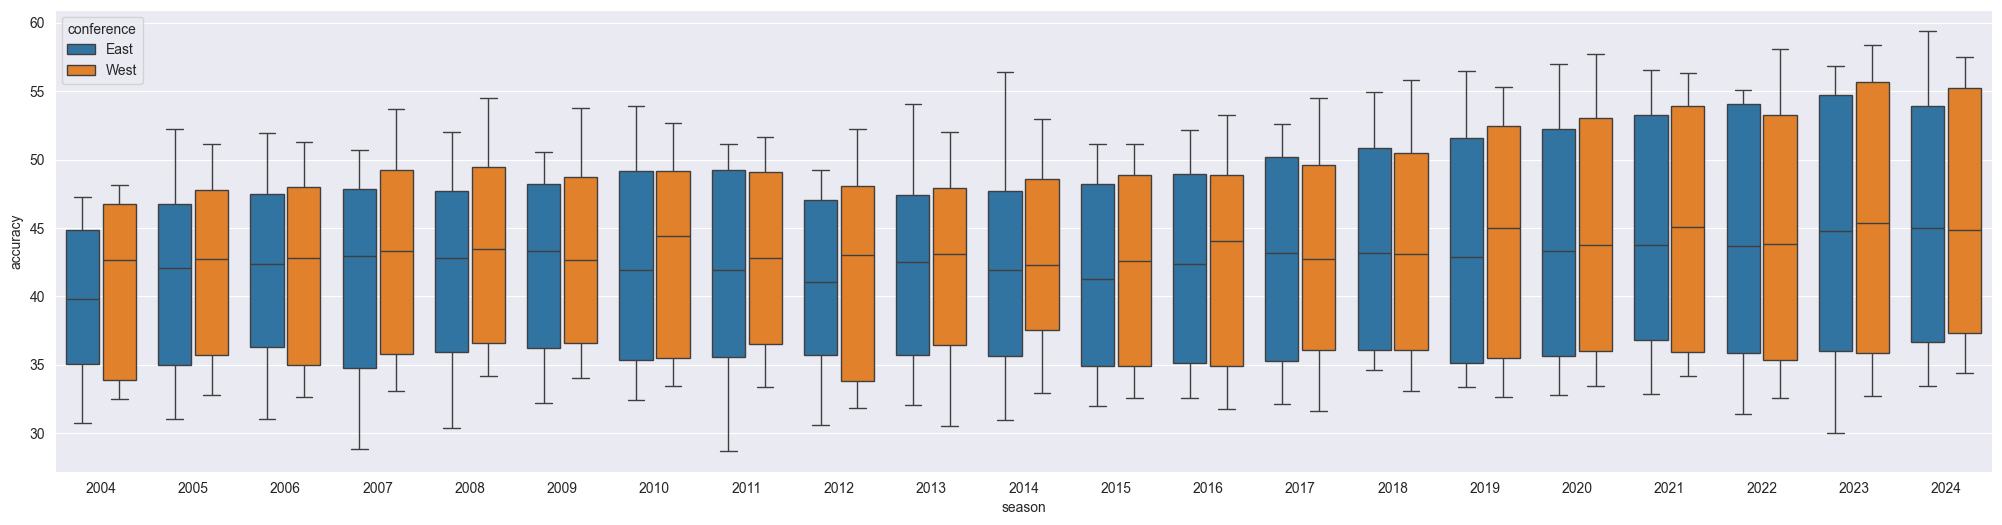

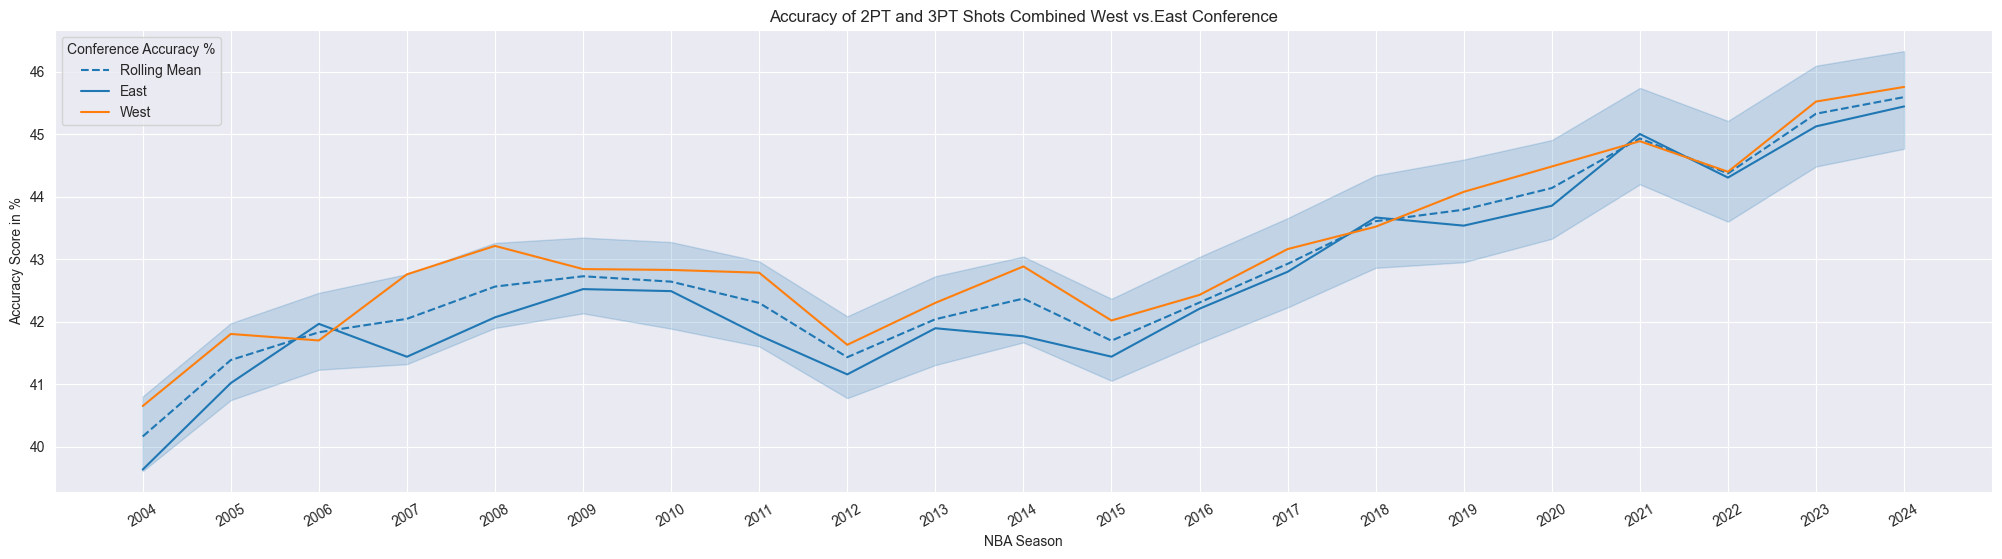

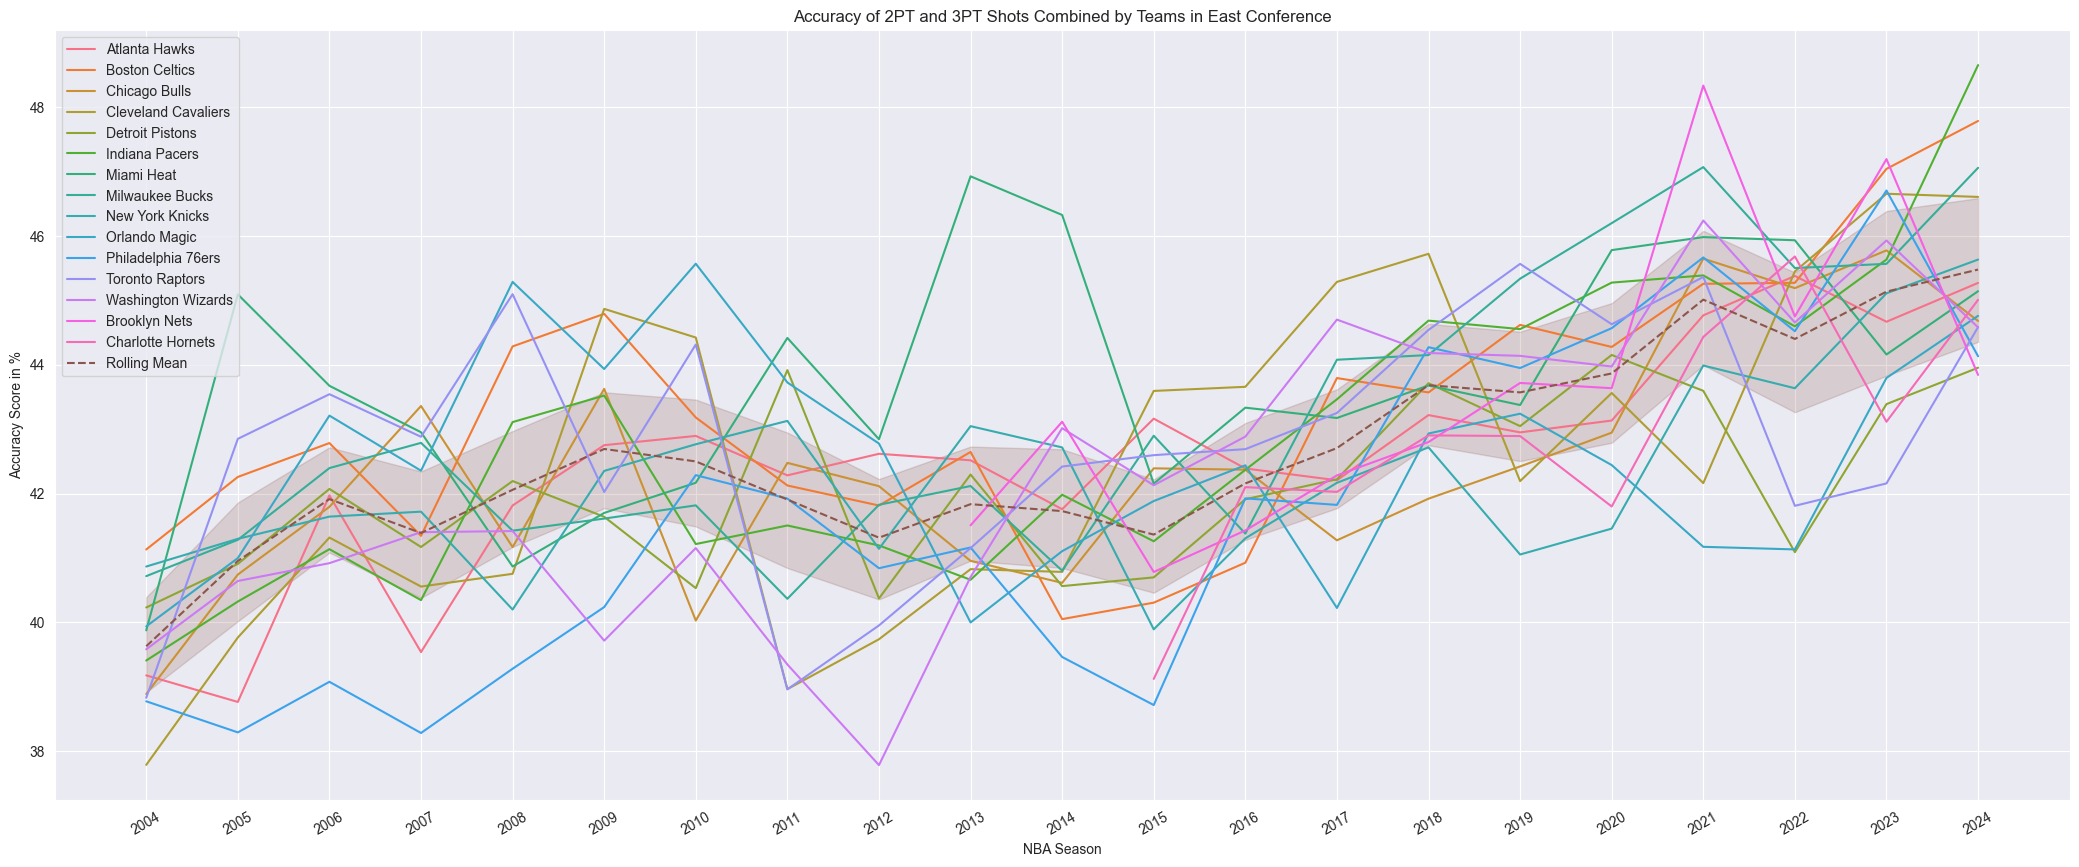

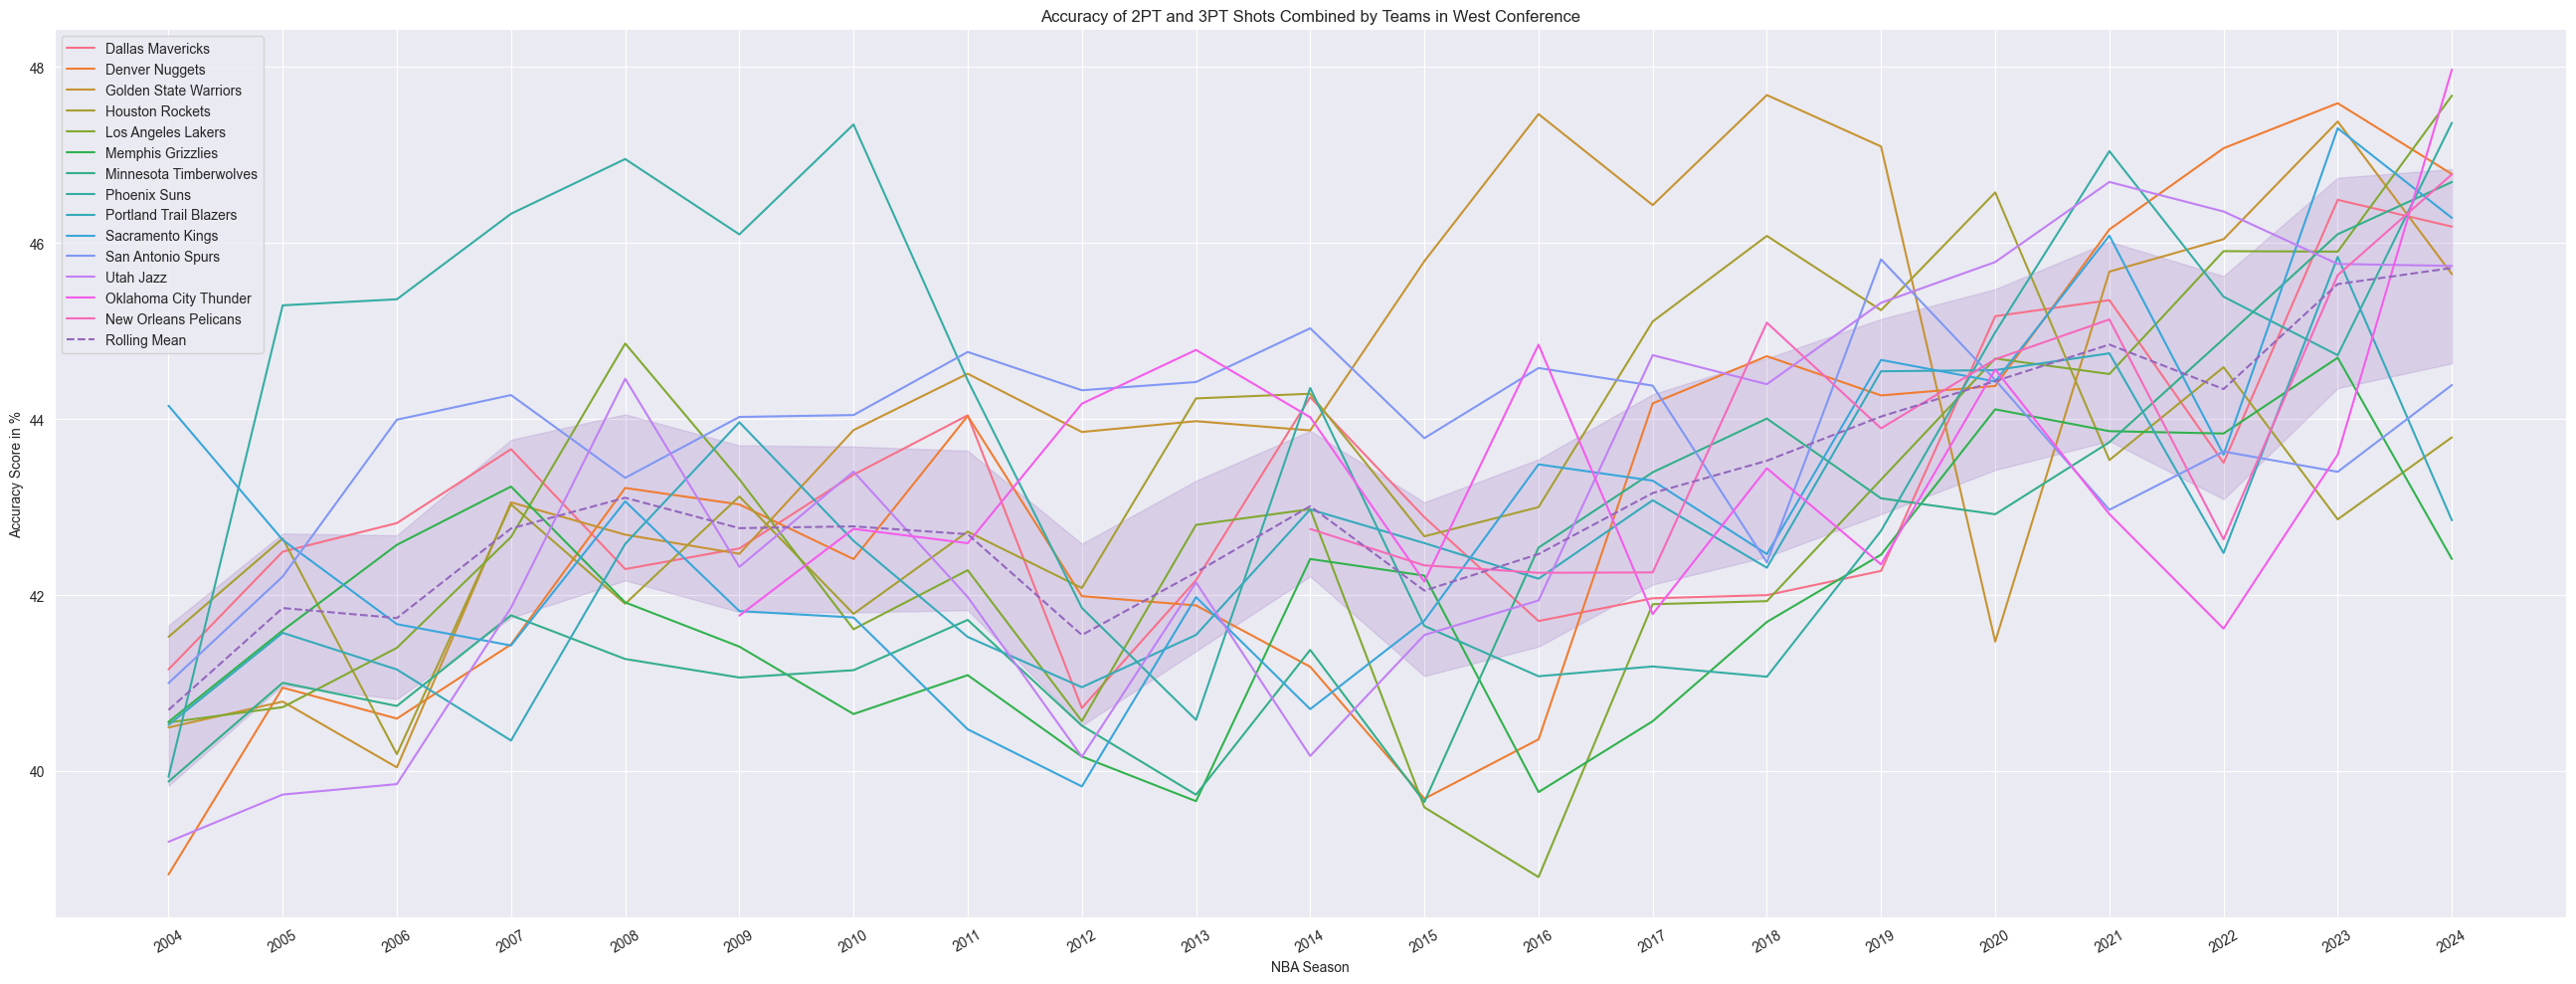

In [107]:
plt.figure(figsize=(25, 6))
#TODO: Perform a ADF test
sns.boxplot(data=shot_type_df, x="season", y="accuracy", hue="conference", gap=.1)

plt.figure(figsize=(25, 6))
# Plot the rolling mean
sns.lineplot(data=rolling_mean, x="season", y="rolling_mean", style=None, linestyle='--',
             markers=False, label="Rolling Mean")
# Plot the League (West and East)
sns.lineplot(data=shot_type_df, x="season", y="accuracy", hue="conference", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(title="Conference Accuracy %")
plt.title("Accuracy of 2PT and 3PT Shots Combined West vs.East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Plot for East Conference
plt.figure(figsize=(26, 10))
sns.lineplot(data=shot_type_df[shot_type_df["conference"] == "East"], x="season", y="accuracy", hue="TEAM_NAME",
             style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 2PT and 3PT Shots Combined by Teams in East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))
# Plot the rolling mean
sns.lineplot(data=rolling_mean[rolling_mean["conference"] == "East"], x="season", y="rolling_mean", style=None,
             linestyle='--',
             markers=False, label="Rolling Mean")
# Plot for West Conference
plt.figure(figsize=(26, 10))
sns.lineplot(data=shot_type_df[shot_type_df["conference"] == "West"], x="season", y="accuracy", hue="TEAM_NAME",
             style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 2PT and 3PT Shots Combined by Teams in West Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))
# Plot the rolling mean
sns.lineplot(data=rolling_mean[rolling_mean["conference"] == "West"], x="season", y="rolling_mean", style=None,
             linestyle='--',
             markers=False, label="Rolling Mean")
plt.tight_layout()
plt.show()

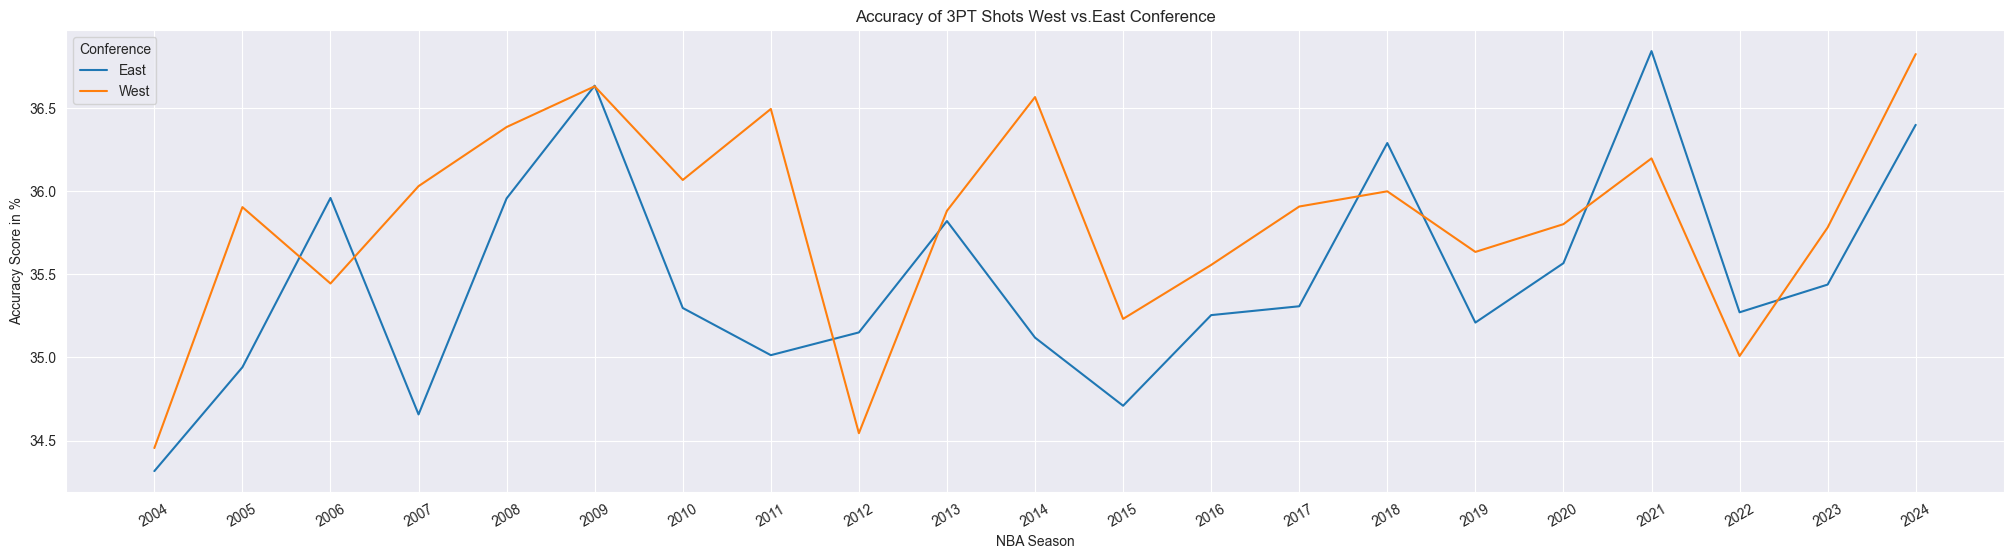

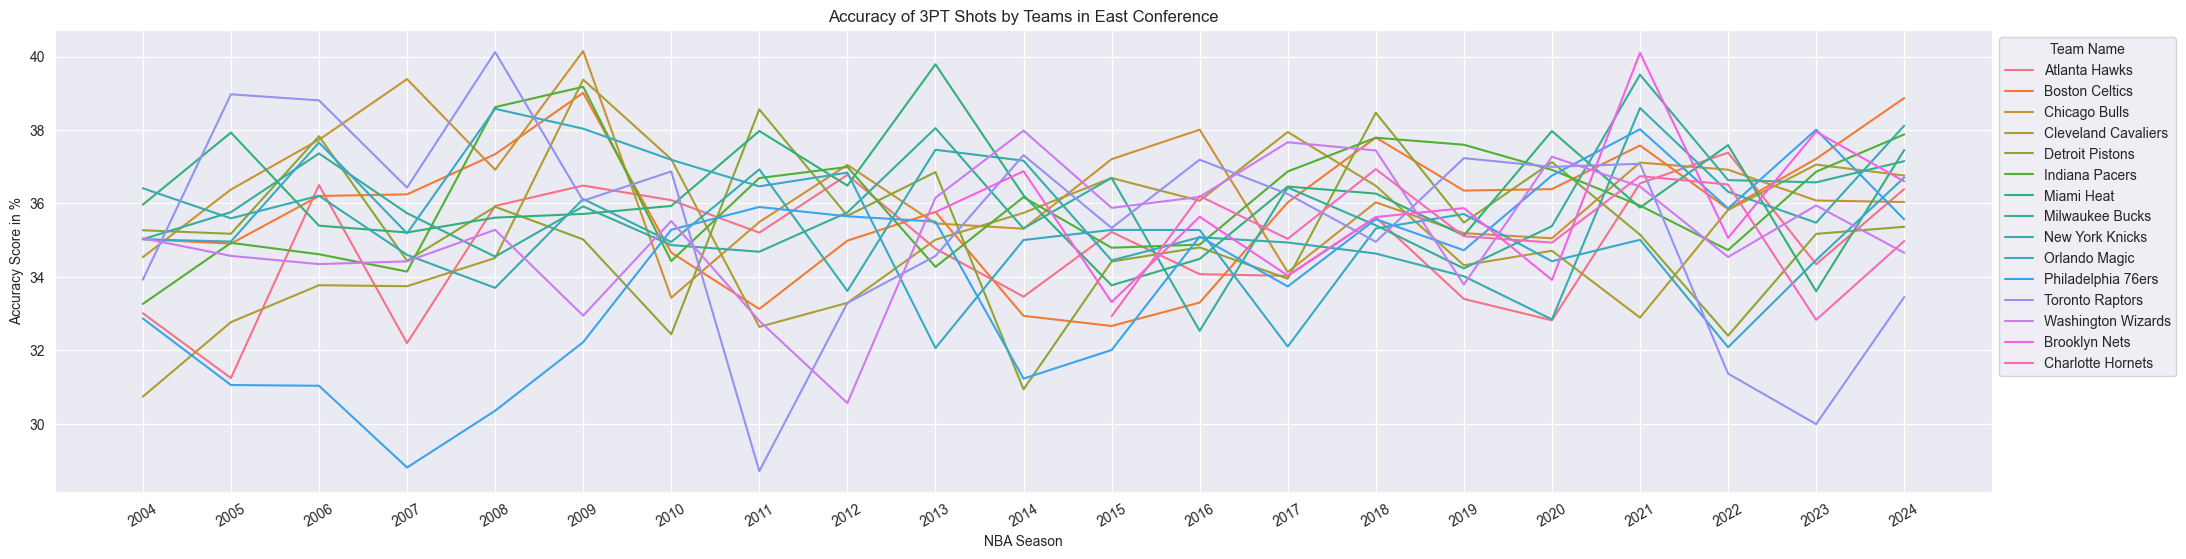

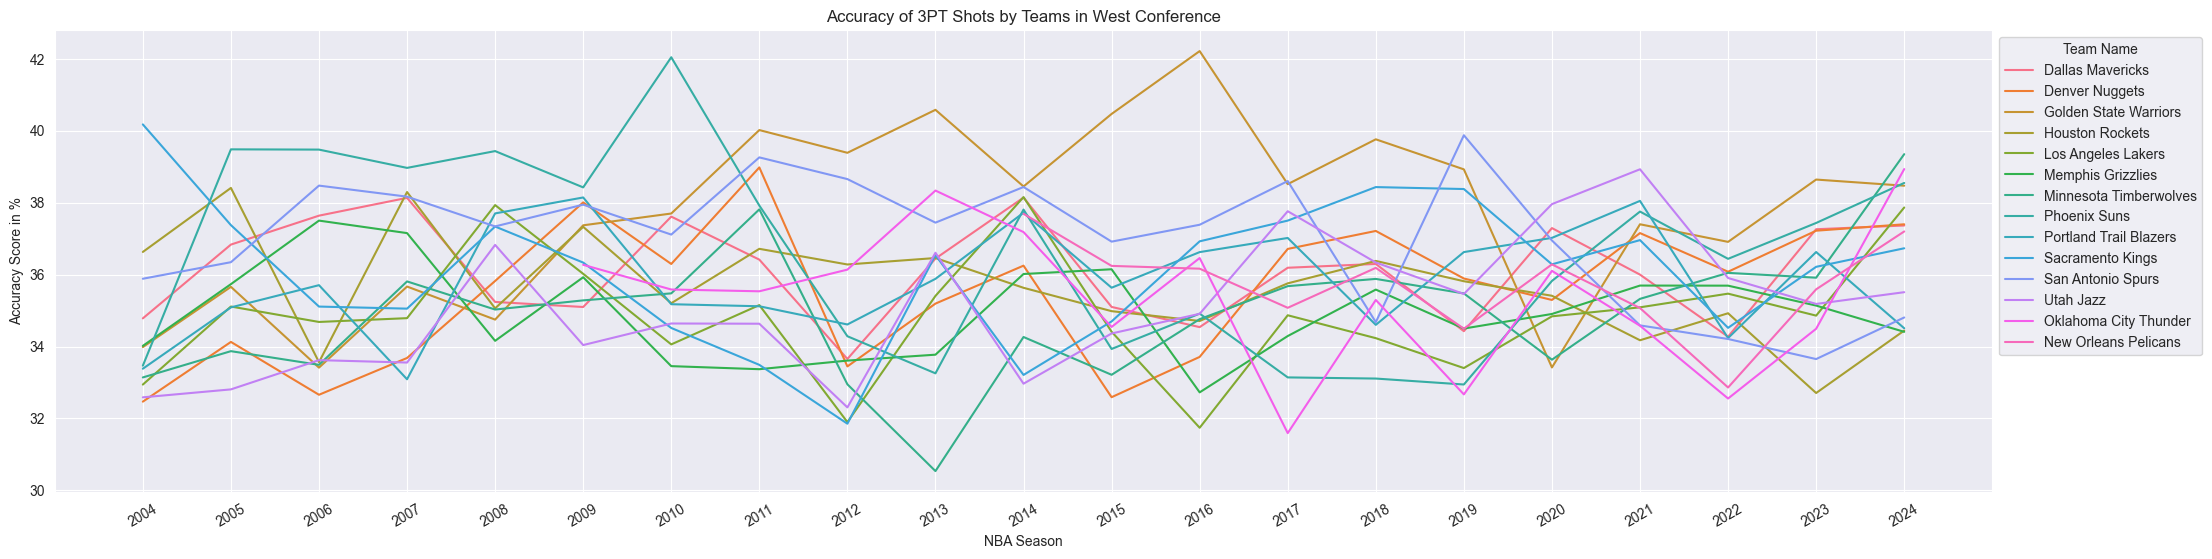

In [108]:
plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[shot_type_df["IS_3PT"] == 1], x="season", y="accuracy",
             hue="conference", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(title="Conference")
plt.title("Accuracy of 3PT Shots West vs.East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

plt.figure(figsize=(25, 6))
sns.lineplot(
    data=shot_type_df[(shot_type_df["conference"] == "East") & (shot_type_df["IS_3PT"] == 1)],
    x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
    errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 3PT Shots by Teams in East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

plt.figure(figsize=(25, 6))
sns.lineplot(
    data=shot_type_df[(shot_type_df["conference"] == "West") & (shot_type_df["IS_3PT"] == 1)],
    x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
    errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 3PT Shots by Teams in West Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))
plt.show()

[Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2021, 0, '2021'),
 Text(2022, 0, '2022'),
 Text(2023, 0, '2023'),
 Text(2024, 0, '2024')]

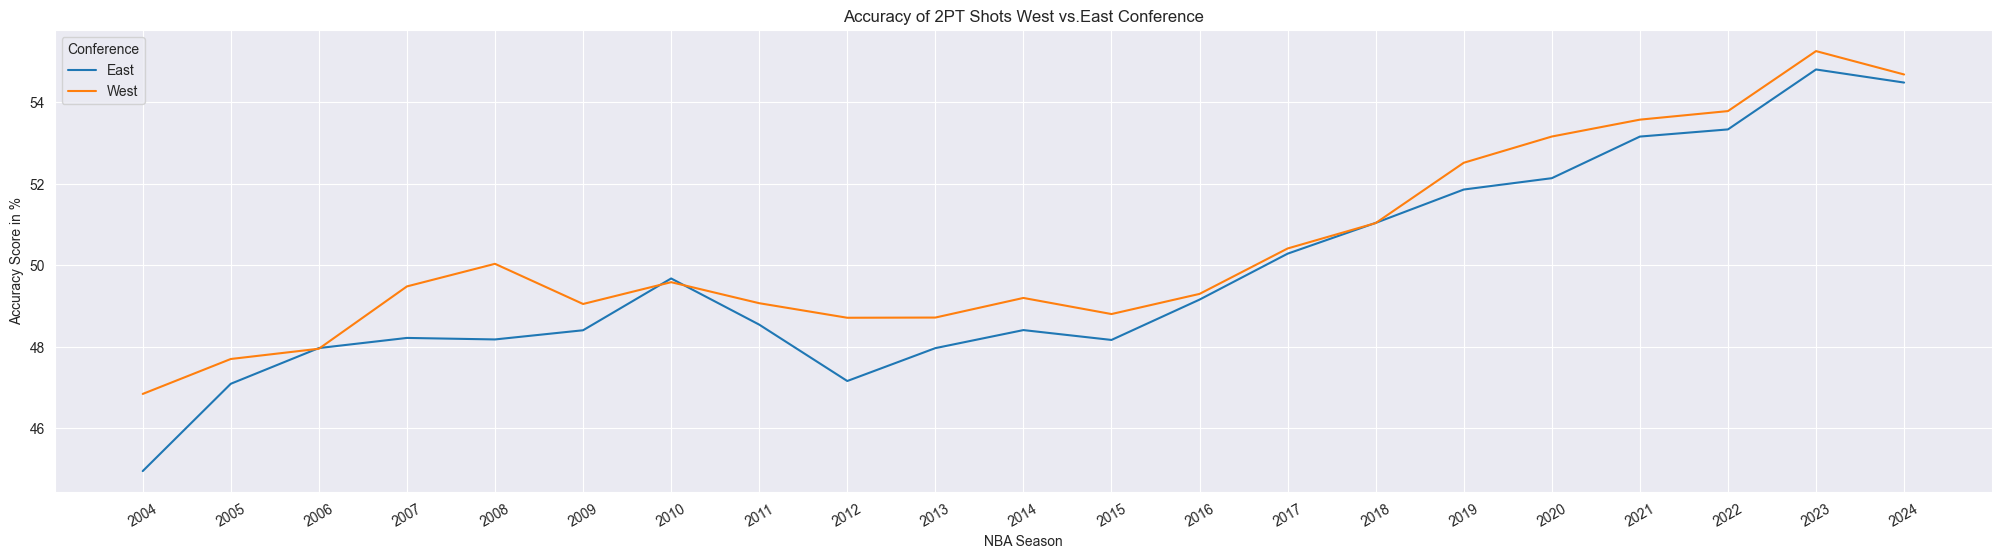

In [109]:

plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[shot_type_df["IS_3PT"] == 0], x="season", y="accuracy",
             hue="conference", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(title="Conference")
plt.title("Accuracy of 2PT Shots West vs.East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))



In [110]:
df_shots_clean.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,TEAM_CONFERENCE,TEAM_ABBREVIATION,rosterstatus,is_home
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,20.0,21.35,25,6,0,0,West,LAL,0,0
1,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,13.3,24.45,23,6,0,9,West,LAL,0,0
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,-1.5,29.95,24,6,1,42,West,LAL,0,0
3,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,-14.6,16.75,18,6,2,27,West,LAL,0,0
4,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,-0.0,5.25,0,6,3,31,West,LAL,0,0


# Predictive Models
- Predict

In [111]:
query = '''
WITH PlayersShotsStats AS (
    SELECT 
        PLAYER_NAME,
        SEASON_1,
        GAME_ID,
        POSITION,
        POSITION_GROUP,
        rosterstatus,
        IS_HOME,
        SUM(CASE 
            WHEN IS_3PT = 0 AND SHOT_MADE = True THEN 2
            WHEN IS_3PT = 1 AND SHOT_MADE = True THEN 3
            ELSE 0 
        END) AS PTS, -- count points scored by each player
        COUNT(SHOT_MADE) AS FGA, -- Field Goal Attempts
        SUM(CASE WHEN SHOT_MADE = True THEN 1 ELSE 0 END) AS FGM, -- Field Goals Made
        SUM(CASE WHEN IS_3PT = 1 THEN 1 ELSE 0 END) AS threePA, -- 3PT Attempts
        SUM(CASE WHEN IS_3PT = 0 THEN 1 ELSE 0 END) AS twoPA, -- 2PT Attempts
        SUM(CASE WHEN IS_3PT = 1 AND SHOT_MADE = True THEN 1 ELSE 0 END) AS threePM, -- 3PT Made
        SUM(CASE WHEN IS_3PT = 0 AND SHOT_MADE = True THEN 1 ELSE 0 END) AS twoPM, -- 2PT Made
        AVG(SHOT_DISTANCE) AS avgShotDist, -- Average Shot Distance
        PLAYER_ID
    FROM nba
    GROUP BY PLAYER_NAME, SEASON_1, GAME_ID
), metrics AS (
    SELECT 
        PLAYER_NAME,
        POSITION,
        POSITION_GROUP,
        SEASON_1,
        GAME_ID,
        rosterstatus,
        IS_HOME,
        PTS,
        FGA,
        FGM,
        threePA,
        threePM,
        twoPA,
        twoPM,
        avgShotDist,
        -- Field Goal Percentage (FG%)
        CASE WHEN FGA > 0 THEN CAST(FGM AS FLOAT) / FGA  ELSE 0 END AS FG_Percentage,
        -- Three-Point Percentage (3P%)
        CASE WHEN threePA > 0 THEN CAST(threePM AS FLOAT) / threePA * 100 ELSE 0 END AS threePM_Percentage,
        -- Two-Point Percentage (2P%)
        CASE WHEN twoPA > 0 THEN CAST(twoPM AS FLOAT) / twoPA * 100 ELSE 0 END AS twoPM_Percentage,
        -- Effective Field Goal Percentage (eFG%)
        CASE WHEN FGA > 0 THEN (CAST(FGM AS FLOAT) + 0.5 * threePM) / FGA * 100 ELSE 0 END AS eFG_Percentage,
        -- Points Per Shot Attempt
        CASE WHEN FGA > 0 THEN CAST(PTS AS FLOAT) / FGA ELSE 0 END AS PTS_per_Shot,
        PLAYER_ID
    FROM PlayersShotsStats
)
SELECT *
FROM metrics m
WHERE PLAYER_NAME IN (
    SELECT PLAYER_NAME
    FROM PlayersShotsStats
    GROUP BY PLAYER_NAME
    HAVING COUNT(DISTINCT GAME_ID) > 5
)
AND rosterstatus = 1
ORDER BY m.SEASON_1, m.GAME_ID;
'''
# Players KPI's over 2004-2024 seasons
players_stats = pd.read_sql(query, conn)
players_stats

,PLAYER_NAME,POSITION,POSITION_GROUP,SEASON_1,GAME_ID,rosterstatus,IS_HOME,PTS,FGA,FGM,...,threePM,twoPA,twoPM,avgShotDist,FG_Percentage,threePM_Percentage,twoPM_Percentage,eFG_Percentage,PTS_per_Shot,PLAYER_ID
0,Udonis Haslem,PF,F,2004,20300001,1,0,2,5,1,...,0,5,1,5.000000,0.200000,0.000000,20.000000,20.000000,0.400000,2617
1,Udonis Haslem,PF,F,2004,20300004,1,0,6,4,3,...,0,4,3,6.000000,0.750000,0.000000,75.000000,75.000000,1.500000,2617
2,LeBron James,SG,G,2004,20300014,1,0,24,20,12,...,0,18,12,12.500000,0.600000,0.000000,66.666667,60.000000,1.200000,2544
3,LeBron James,SG,G,2004,20300018,1,0,17,17,8,...,1,12,7,13.117647,0.470588,20.000000,58.333333,50.000000,1.000000,2544
4,Udonis Haslem,PF,F,2004,20300020,1,1,12,12,6,...,0,12,6,1.833333,0.500000,0.000000,50.000000,50.000000,1.000000,2617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141346,LeBron James,PF,F,2024,22301230,1,1,22,12,9,...,4,8,5,12.666667,0.750000,100.000000,62.500000,91.666667,1.833333,2544
141347,Naji Marshall,SF,F,2024,22301230,1,0,3,2,1,...,1,1,0,11.500000,0.500000,100.000000,0.000000,75.000000,1.500000,1630230
141348,Rui Hachimura,PF,F,2024,22301230,1,1,11,9,5,...,1,6,4,12.777778,0.555556,33.333333,66.666667,61.111111,1.222222,1629060
141349,Trey Murphy III,SF,F,2024,22301230,1,0,12,13,5,...,2,6,3,15.461538,0.384615,28.571429,50.000000,46.153846,0.923077,1630530


In [112]:
players_stats = pd.merge(left=players_stats, right=df_active_players[["PLAYER_ID", "age"]], on="PLAYER_ID")
players_stats.head(2)

,PLAYER_NAME,POSITION,POSITION_GROUP,SEASON_1,GAME_ID,rosterstatus,IS_HOME,PTS,FGA,FGM,...,twoPA,twoPM,avgShotDist,FG_Percentage,threePM_Percentage,twoPM_Percentage,eFG_Percentage,PTS_per_Shot,PLAYER_ID,age
0,Udonis Haslem,PF,F,2004,20300001,1,0,2,5,1,...,5,1,5.0,0.20,0.0,20.0,20.0,0.4,2617,43
1,Udonis Haslem,PF,F,2004,20300004,1,0,6,4,3,...,4,3,6.0,0.75,0.0,75.0,75.0,1.5,2617,43


In [113]:
# create different rolling averages for k last games 
players_stats_model1 = players_stats
rolling_games = list(range(4, 11))


def calc_rolling_games(k):
    print(k)
    players_stats_model1[f'FG%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')[
        'FG_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())
    players_stats_model1[f'threePM%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')[
        'threePM_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())
    players_stats_model1[f'twoPM%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')[
        'twoPM_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())
    players_stats_model1[f'eFG%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')[
        'eFG_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())
    players_stats_model1[f'PTS_per_shot_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')[
        'PTS_per_Shot'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())


for k in rolling_games:
    calc_rolling_games(k)

4
5
6
7
8
9
10


In [114]:
# create different rolling averages for k last seasons 
rolling_seasons = list(range(2, 5))


def calc_rolling_seasons(j):
    print(j)
    players_stats_model1[f'FG%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])[
        'FG_Percentage'].transform(lambda x: x.rolling(window=j, min_periods=1).mean())
    players_stats_model1[f'threePM%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])[
        'threePM_Percentage'].transform(lambda x: x.rolling(window=j, min_periods=1).mean())
    players_stats_model1[f'twoPM%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])[
        'twoPM_Percentage'].transform(lambda x: x.rolling(window=j, min_periods=1).mean())
    players_stats_model1[f'eFG%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])[
        'eFG_Percentage'].transform(lambda x: x.rolling(window=j, min_periods=1).mean())
    players_stats_model1[f'PTS_per_shot_rolling_{j}_seasons'] = \
        players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])[
            'PTS_per_Shot'].transform(lambda x: x.rolling(window=j, min_periods=1).mean())


for j in rolling_seasons:
    calc_rolling_seasons(j)

2
3
4


In [115]:
players_stats_model1 = players_stats_model1.drop(
    columns=["POSITION", "POSITION_GROUP", "PLAYER_NAME", "SEASON_1", "IS_HOME", "PTS", "FGA", "FGM", "threePA",
             "threePM", "twoPA", "twoPM"])
players_stats_model1.head()

,GAME_ID,rosterstatus,avgShotDist,FG_Percentage,threePM_Percentage,twoPM_Percentage,eFG_Percentage,PTS_per_Shot,PLAYER_ID,age,...,FG%_rolling_3_seasons,threePM%_rolling_3_seasons,twoPM%_rolling_3_seasons,eFG%_rolling_3_seasons,PTS_per_shot_rolling_3_seasons,FG%_rolling_4_seasons,threePM%_rolling_4_seasons,twoPM%_rolling_4_seasons,eFG%_rolling_4_seasons,PTS_per_shot_rolling_4_seasons
0,20300001,1,5.000000,0.200000,0.0,20.000000,20.000000,0.400000,2617,43,...,0.200000,0.0,20.000000,20.000000,0.400000,0.200000,0.0,20.000000,20.000000,0.400000
1,20300004,1,6.000000,0.750000,0.0,75.000000,75.000000,1.500000,2617,43,...,0.475000,0.0,47.500000,47.500000,0.950000,0.475000,0.0,47.500000,47.500000,0.950000
2,20300020,1,1.833333,0.500000,0.0,50.000000,50.000000,1.000000,2617,43,...,0.483333,0.0,48.333333,48.333333,0.966667,0.483333,0.0,48.333333,48.333333,0.966667
3,20300045,1,7.000000,0.666667,0.0,66.666667,66.666667,1.333333,2617,43,...,0.638889,0.0,63.888889,63.888889,1.277778,0.529167,0.0,52.916667,52.916667,1.058333
4,20300051,1,8.714286,0.428571,0.0,42.857143,42.857143,0.857143,2617,43,...,0.531746,0.0,53.174603,53.174603,1.063492,0.586310,0.0,58.630952,58.630952,1.172619


# Feature Engineering/Extraction

In [116]:
# These columns will be dropped and will not be used for training the model
# Some features seem intuitevly irrelevant, some might leak some information to the model and that 
# the rest might be redundant which can affect inference
# EVENT_TYPE is another example that leaks information (missed shot or made shot)
# This will be focused on predicting weather a player will be able to make a shot or not given specific features

# TEAM_ABBREVIATION: Using team id instead of abbr
# TEAM_NAME: Using team id instead
# rosterstatus: Determines wether a player is active or not. Doesn't matter since we need to predict on test weather a player will be able to make a shot or not
# SHOT_MADE: The variable will be prediciting 
# EVENT_TYPE: Leaks wether a player will make a shot or not e.g Missed Shot, Made Shot
# GAME_ID: Just a unique identifier for the game probably don't need
# GAME_DATE: Time can help maybe a player improves over time, but hot encoding would be tedious
# SEASON_2: Just keeping SEASON_1 redandunt information 
# POSITION_GROUP: Already have position
# ZONE_ABB: Already have ZONE
# PLAYER_NAME: using PLAYER_ID which will be hot encoded
# AWAY_TEAM: Might be same as TEAM_NAME
# HOME_TEAM: Using is_home instead

df_shots_clean_drop = ["TEAM_ABBREVIATION", "TEAM_NAME",
                       "rosterstatus",
                       "EVENT_TYPE", "GAME_DATE",
                       "SEASON_2", "POSITION_GROUP", "ZONE_ABB",
                       "PLAYER_NAME", "AWAY_TEAM", "HOME_TEAM"]

one_hot_encoding_columns = ["SEASON_1", "TEAM_ID", "PLAYER_ID", "ACTION_TYPE", "BASIC_ZONE", "PLAYER_ID",
                            "ZONE_RANGE", "TEAM_CONFERENCE", "ZONE_NAME", "POSITION"]

In [117]:
df_pre_train = df_shots_clean.drop(df_shots_clean_drop, axis=1)
df_pre_train = df_pre_train.merge(players_stats_model1, on=["PLAYER_ID", "GAME_ID"]).reset_index(drop=True)
df_pre_train.head()

,SEASON_1,TEAM_ID,PLAYER_ID,POSITION,GAME_ID,SHOT_MADE,ACTION_TYPE,IS_3PT,BASIC_ZONE,ZONE_NAME,...,FG%_rolling_3_seasons,threePM%_rolling_3_seasons,twoPM%_rolling_3_seasons,eFG%_rolling_3_seasons,PTS_per_shot_rolling_3_seasons,FG%_rolling_4_seasons,threePM%_rolling_4_seasons,twoPM%_rolling_4_seasons,eFG%_rolling_4_seasons,PTS_per_shot_rolling_4_seasons
0,2015,1610612747,203903,PG,21401211,False,Jump Shot,1,Above the Break 3,Center,...,0.464773,41.111111,47.606838,51.622111,1.032442,0.445802,30.833333,47.371795,48.438805,0.968776
1,2015,1610612747,203903,PG,21401211,False,Running Layup Shot,0,Restricted Area,Center,...,0.464773,41.111111,47.606838,51.622111,1.032442,0.445802,30.833333,47.371795,48.438805,0.968776
2,2015,1610612747,203903,PG,21401211,True,Jump Shot,1,Above the Break 3,Center,...,0.464773,41.111111,47.606838,51.622111,1.032442,0.445802,30.833333,47.371795,48.438805,0.968776
3,2015,1610612747,203903,PG,21401211,True,Jump Shot,0,Mid-Range,Right Side Center,...,0.464773,41.111111,47.606838,51.622111,1.032442,0.445802,30.833333,47.371795,48.438805,0.968776
4,2015,1610612747,203903,PG,21401211,False,Jump Shot,0,In The Paint (Non-RA),Right Side,...,0.464773,41.111111,47.606838,51.622111,1.032442,0.445802,30.833333,47.371795,48.438805,0.968776


In [118]:
df_pre_train["SHOT_MADE"] = df_pre_train["SHOT_MADE"].astype(int)

In [119]:
# check if labels are inbalanced
df_pre_train["SHOT_MADE"].value_counts()

SHOT_MADE
0    731342
1    646847
Name: count, dtype: int64

# Training With Decision Tree Algorithms
## Filter Out Players

We filter out players that played at least a 1000 games. This gives enough data about each player
for train/test split.

In [120]:
# We'll do 80/20 split for each player this means we'll train the algorithm on 80% of the games that the player attended
# and test our algorithm on the remaining 20%
train_dfs = []
test_dfs = []

# loop through each player
for player, player_df in df_pre_train.groupby('PLAYER_ID'):
    if len(player_df) < 1000:
        continue
    train_subset, test_subset = train_test_split(player_df, train_size=0.8, random_state=42, shuffle=True)
    train_dfs.append(train_subset)
    test_dfs.append(test_subset)

# concatenate all subsets
train_df = pd.concat(train_dfs, ignore_index=True)
test_df = pd.concat(test_dfs, ignore_index=True)

In [121]:
# One hot encoding
train_df = pd.get_dummies(train_df, columns=one_hot_encoding_columns, dtype=SparseDtype("int", 0))
test_df = pd.get_dummies(test_df, columns=one_hot_encoding_columns, dtype=SparseDtype("int", 0))

# Align train and test columns
train_df, test_df = train_df.align(test_df, join="outer", axis=1, fill_value=0)


In [122]:
train_df.shape, test_df.shape

((1060727, 1384), (265326, 1384))

In [123]:
# to have at least 50k samples in the training set
subset_size = 50000 / train_df.shape[0]
subset_size

0.047137482123109906

In [124]:
%%time
x_train, y_train = train_df.drop("SHOT_MADE", axis=1), train_df["SHOT_MADE"]
x_test, y_test = test_df.drop("SHOT_MADE", axis=1), test_df["SHOT_MADE"]

# Checking class distribution in the training set
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

# Checking class distribution in the test set
print("\nTest Set Class Distribution:")
print(y_test.value_counts(normalize=True))

x_train = csr_matrix(x_train.values)
x_test = csr_matrix(x_test.values)

Training Set Class Distribution:
SHOT_MADE
0    0.530897
1    0.469103
Name: proportion, dtype: float64

Test Set Class Distribution:
SHOT_MADE
0    0.531995
1    0.468005
Name: proportion, dtype: float64
CPU times: user 10.8 s, sys: 2.22 s, total: 13 s
Wall time: 13.1 s


In [125]:

scoring = "accuracy"
models = []
max_iter = 2000

models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(("AdaBoostClassifier", AdaBoostClassifier()))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("ExtraTreesClassifier", ExtraTreesClassifier()))
models.append(("LogisticRegression", LogisticRegression(max_iter=max_iter, solver='saga')))
models.append(
    ("Lasso (Logistic Regression)", LogisticRegression(penalty='l1', solver='saga', C=1.0, max_iter=max_iter)))
models.append(("RidgeClassifier", RidgeClassifier(alpha=1.0, max_iter=max_iter)))
models.append(("ElasticNet (Logistic Regression)",
               LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=max_iter)))
models.append(("SVC", SVC()))


# Applying PCA To Our Data

As you can see above we have 800+ features after we applied one hot encoding to the data. We have 3,000,000+ rows which can make this computationally inefficient and can affect training. We'll try to capture most of the variance and hopefully reduce our data data then apply
cross validation.

In [126]:
%%time
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_subset_scaled, _, y_train_subset_scaled, _ = train_test_split(x_train_scaled, y_train, train_size=subset_size,
                                                                      random_state=42, shuffle=True)

CPU times: user 866 ms, sys: 295 ms, total: 1.16 s
Wall time: 1.16 s


CPU times: user 2min 4s, sys: 49.3 s, total: 2min 54s
Wall time: 28.7 s


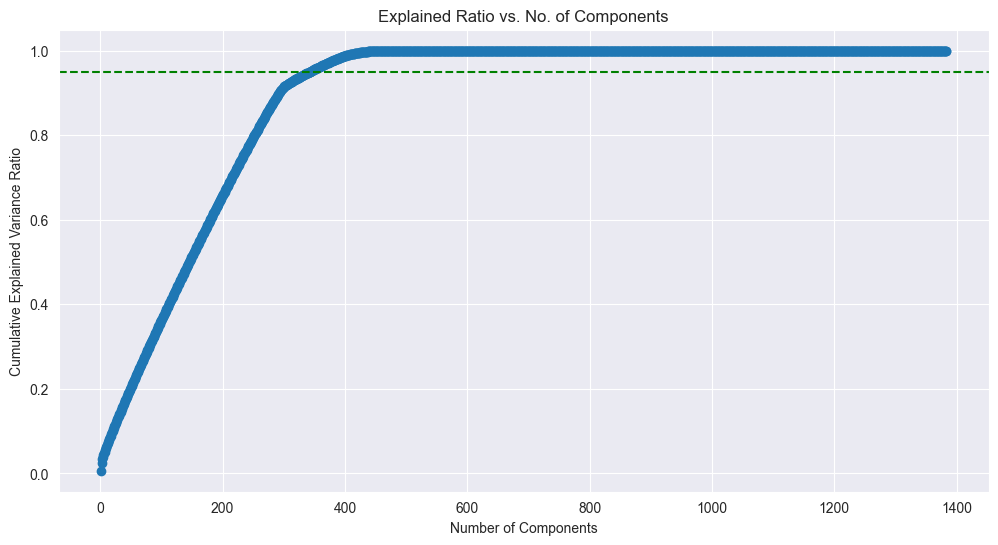

In [127]:
%%time

svd = TruncatedSVD(n_components=train_df.shape[1] - 1)
svd.fit_transform(x_train_subset_scaled)

# explained variance ratio
ratio = svd.explained_variance_ratio_

cum_sum = np.cumsum(ratio)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cum_sum) + 1), cum_sum, marker='o', linestyle='-')
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Explained Variance")
# 95% threshold
components_95 = np.argmax(cum_sum >= 0.95) + 1
plt.scatter(components_95, cum_sum[components_95 - 1], color='green', label=f"95%: {components_95} Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Ratio vs. No. of Components")
plt.grid(True)


In [128]:
n_components_95 = np.argmax(cum_sum >= 0.95) + 1
n_components_95

343

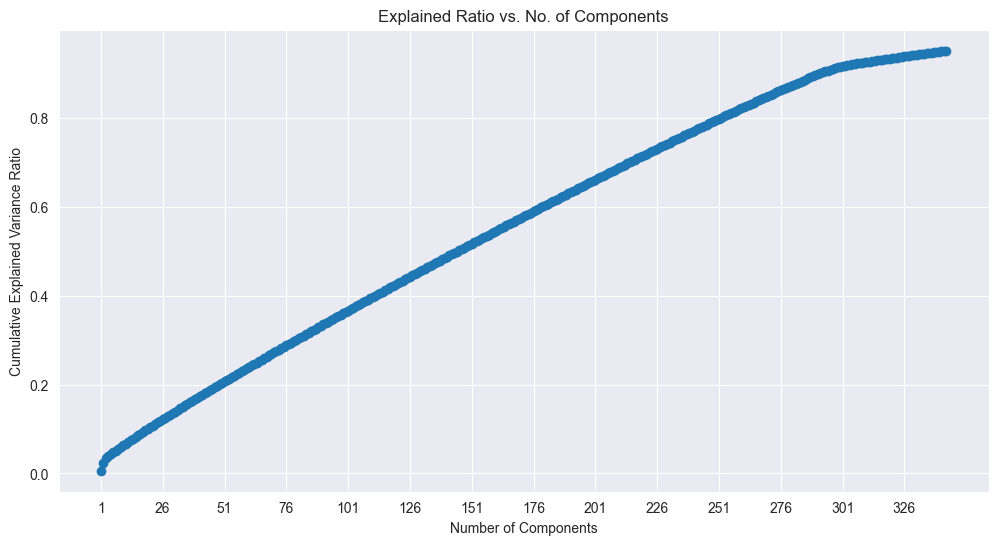

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cum_sum[:n_components_95]) + 1), cum_sum[:n_components_95], marker='o', linestyle='-')
plt.xticks(range(1, len(cum_sum[:n_components_95]) + 1, 25))
plt.xticks()
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Ratio vs. No. of Components")
plt.grid(True)

In [130]:
%time
# As we can see above we can reduce the data to less than 350 (compared to 1300+) components and have more than 95% of the variance explained
# so we'll proceed with
svd = TruncatedSVD(n_components=n_components_95)
svd.fit(x_train_scaled)

x_train_svd, x_test_svd = svd.transform(x_train_scaled), svd.transform(x_test_scaled)
x_train_svd.shape

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


(1060727, 343)

In [133]:

%time


x_train_subset_svd, _, y_train_subset_svd, _ = train_test_split(x_train_svd, y_train, train_size=subset_size, random_state=42,shuffle=True)

param_grids = {
    "DecisionTreeClassifier": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"],
    },
    "AdaBoostClassifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0],
    },
    "GradientBoostingClassifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5, 10],
    },
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2, 4],
    },
    "ExtraTreesClassifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2, 4],
    },
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
    },
    "Lasso (Logistic Regression)": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1"],
    },
    "RidgeClassifier": {
        "alpha": [0.1, 1.0, 10.0],
        "max_iter": [1000, 2000],
    },
    "ElasticNet (Logistic Regression)": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["elasticnet"],
        "l1_ratio": [0.1, 0.5, 0.9],
    },
    "SVC": {
        "C": [0.1, 1],
        "kernel": ["rbf"],
        "gamma": ["scale"],
    },
}


if os.path.exists('best_models.pkl.zip'):
    #unzip the file
    with zipfile.ZipFile('best_models.pkl.zip', 'r') as file:
        file.extractall()
        best_models = joblib.load('best_models.pkl')
        print("Best Models Loaded")
else:
    best_models = {}
    for name, model in models:
        print(f"Tuning {name}")
        param_grid = param_grids.get(name, None)
        grid_search = RandomizedSearchCV(model, param_grid, cv=3, scoring=scoring, n_jobs=-1, verbose=1, n_iter=10)
        grid_search.fit(x_train_subset_svd, y_train_subset_svd)
        best_score_ = grid_search.best_score_
        best_params_ = grid_search.best_params_
        best_models[name] = (grid_search.best_estimator_, best_params_, best_score_)
        print(f"Best parameters for {name}: {best_params_}")
        print(f"Best cross-validation score: {best_score_}")
    joblib.dump(best_models, 'best_models.pkl')
    print("Best Models Saved")


CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
Tuning DecisionTreeClassifier
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
Best cross-validation score: 0.6116199828889538
Tuning AdaBoostClassifier
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for AdaBoostClassifier: {'n_estimators': 200, 'learning_rate': 1.0}
Best cross-validation score: 0.6622399365285224
Tuning GradientBoostingClassifier
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for GradientBoostingClassifier: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5, 'learning_rate': 0.1}
Best cross-validation score: 0.6700000357367147
Tuning RandomForestClassifier
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for RandomForestClassifier: {'n_estimators': 200, 'min_samples_s

DecisionTreeClassifier Test Accuracy: 0.6116199828889538
AdaBoostClassifier Test Accuracy: 0.6622399365285224
GradientBoostingClassifier Test Accuracy: 0.6700000357367147
RandomForestClassifier Test Accuracy: 0.6445200245161063
ExtraTreesClassifier Test Accuracy: 0.6421799381125061
LogisticRegression Test Accuracy: 0.6618599561286105
Lasso (Logistic Regression) Test Accuracy: 0.6648999517309545
RidgeClassifier Test Accuracy: 0.6618200013294826
ElasticNet (Logistic Regression) Test Accuracy: 0.6634599433296345
SVC Test Accuracy: 0.6606200133287625


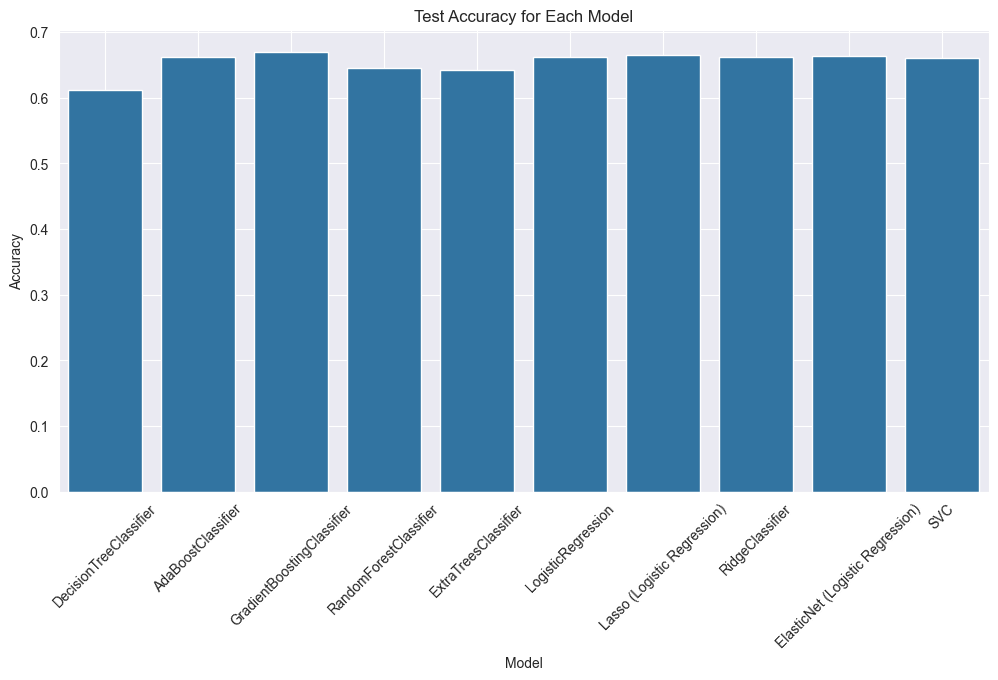

In [134]:
test_scores = {}

# evaluate each model
for name, tuple in best_models.items():
    model = tuple[0]
    score = tuple[2]
    test_scores[name] = score
    print(f"{name} Test Accuracy: {score}")
    
plt.figure(figsize=(12, 6))
sns.barplot(x=list(test_scores.keys()), y=list(test_scores.values()))
plt.xticks(rotation=45) 
plt.title("Test Accuracy for Each Model")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(True)
plt.show()



In [135]:

# model with the highest score
# best_model_name = max(test_scores, key=test_scores.get)
# We prefer AdaBoostClassifier instead of DecisionTreeClassifier because it requires less computational power, and the accuracy is similar
best_model_name_2 = "ElasticNet (Logistic Regression)"
best_model_name_1 = "AdaBoostClassifier"
best_model_1, best_params_1, best_score_1 = best_models[best_model_name_1]
best_model_2, best_params_2, best_score_2 = best_models[best_model_name_2]

print(f"\nBest Model: {best_model_name_1}")
print(f"Test Accuracy: {best_score_1}")
print(f"Parameters: {best_params_1}")
print(f"\nBest Model 2: {best_model_2}")
print(f"Test Accuracy 2: {best_score_2}")
print(f"Parameters: {best_params_2}")


Best Model: AdaBoostClassifier
Test Accuracy: 0.6622399365285224
Parameters: {'n_estimators': 200, 'learning_rate': 1.0}

Best Model 2: LogisticRegression(C=0.01, l1_ratio=0.5, max_iter=2000, penalty='elasticnet',
                   solver='saga')
Test Accuracy 2: 0.6634599433296345
Parameters: {'penalty': 'elasticnet', 'l1_ratio': 0.5, 'C': 0.01}


CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
Learning curve results loaded from file.


<Figure size 1200x600 with 0 Axes>

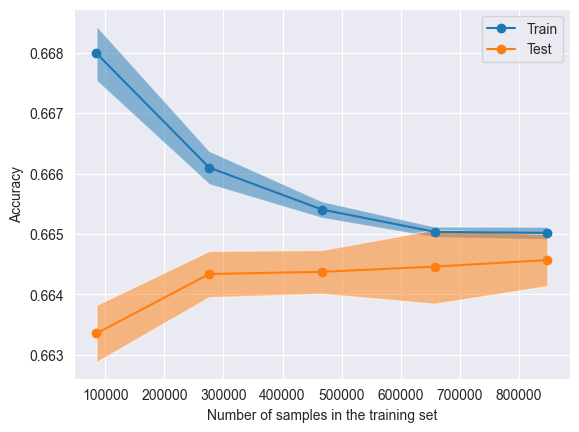

<Figure size 1200x600 with 0 Axes>

In [180]:
%time
from sklearn.model_selection import ShuffleSplit, LearningCurveDisplay

common_params = {
    "X": x_train_svd,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=3, test_size=0.2),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

filename = 'learning_curve_results.pkl'
try:
    learning_curve_results = joblib.load(filename)
    print("Learning curve results loaded from file.")
except FileNotFoundError:
    print("Learning curve results not found, computing...")
    
    learning_curve_results = {}

    estimator = best_model_2

    learning_curve_results[estimator.__class__.__name__] = LearningCurveDisplay.from_estimator(
        estimator, **common_params)

    joblib.dump(learning_curve_results, filename)
    print(f"Learning curve results for {estimator.__class__.__name__} saved to {filename}")

# plt.figure(figsize=(12, 6))
# 
# results = learning_curve_results[best_model_2.__class__.__name__]
# results.plot()
# plt.title(f"Learning Curve for {best_model_2.__class__.__name__}")
# plt.tight_layout()
# plt.show()

## **NOTE**: Using PCA speeds up computation and has similar accuracy when compared to previous models when using all the features (Previously 10 mins now ~14 seconds after PCA

## Neural Networks with Torch

In [137]:
# device that will be used for training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [160]:
# For our first architecture we'll be using a  Feed Forward Neural Network to see if it can surpass the accuracy
# of our machine learning algorithms. 
class FNN(nn.Module):
    def __init__(self, input_dim):
        super(FNN, self).__init__()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 1024),  
            nn.ReLU(),
            nn.Dropout(p=0.4),  
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(p=0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.35),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(p=0.15),
            nn.Linear(32, 1)  
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [161]:
input_dim = x_train_svd.shape[1]
model = FNN(input_dim).to(device)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(model.parameters)
print("Total Params: ", total_params)

<bound method Module.parameters of FNN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=343, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.35, inplace=False)
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=128, out_features=64, bias=True)
    (13): ReLU()
    (14): Dropout(p=0.2, inplace=False)
    (15): Linear(in_features=64, out_features=32, bias=True)
    (16): ReLU()
    (17): Dropout(p=0.15, inplace=False)
    (18): Linear(in_features=32, out_features=1, bias=True)
  )
)>
Total Params:  1051649


In [162]:
%%time
input_dim = x_train_svd.shape[1]  # Should be 3
fnn = FNN(input_dim).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(fnn.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# 5. Convert Data to PyTorch Tensors
features_train_tensor = torch.tensor(x_train_svd, dtype=torch.float32)
labels_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)

features_test_tensor = torch.tensor(x_test_svd, dtype=torch.float32)
labels_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)

# 6. Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(features_train_tensor, labels_train_tensor)
test_dataset = TensorDataset(features_test_tensor, labels_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=os.cpu_count())
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=os.cpu_count())

# 7. Training Loop with Checkpointing and Evaluation Metrics
epochs = 100
patience = 5

# Path to save the best model
best_model_path = 'best_fnn_model.pth'

CPU times: user 358 ms, sys: 297 ms, total: 655 ms
Wall time: 94 ms


In [163]:
%%time

def train_NN_model(model, train_loader, test_loader, optimizer, criterion, scheduler,
                   epochs, device, patience, best_model_path):
    best_test_accuracy = 0
    best_epoch = 0
    counter = 0

    loss_LIST_log, acc_LIST_log = [], []
    test_acc_LIST_log = []
    precision_LIST, recall_LIST, f1_LIST, roc_auc_LIST = [], [], [], []

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Step 1: Reset gradients
            optimizer.zero_grad()

            # Step 2: Forward pass
            outputs = model(inputs)  # Raw logits

            # Step 3: Compute loss
            loss = criterion(outputs, labels)

            # Step 4: Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item()

            # Step 5: Compute predictions
            probabilities = torch.sigmoid(outputs)
            predicted = (probabilities >= 0.5).float()

            # Step 6: Update correct predictions and total
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        # Calculate training accuracy for the epoch
        train_accuracy = 100 * correct / total

        # Calculate average loss for the epoch
        average_loss = running_loss / len(train_loader)
        loss_LIST_log.append(average_loss)
        acc_LIST_log.append(train_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

        # Step 7: Evaluate on test set
        model.eval()  # Set model to evaluation mode
        test_correct = 0
        test_total = 0
        test_running_loss = 0.0

        all_test_labels = []
        all_test_predictions = []
        all_test_probabilities = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

                # Forward pass
                test_outputs = model(test_inputs)
                test_loss = criterion(test_outputs, test_labels)

                # Accumulate test loss
                test_running_loss += test_loss.item()

                # Compute test predictions
                test_probabilities = torch.sigmoid(test_outputs)
                test_predicted = (test_probabilities >= 0.5).float()

                # Update correct and total
                test_correct += (test_predicted == test_labels).sum().item()
                test_total += test_labels.size(0)

                # Store for metric calculations
                all_test_labels.extend(test_labels.cpu().numpy())
                all_test_predictions.extend(test_predicted.cpu().numpy())
                all_test_probabilities.extend(test_probabilities.cpu().numpy())

        # Calculate test accuracy
        test_accuracy = 100 * test_correct / test_total
        test_acc_LIST_log.append(test_accuracy)

        # Calculate average test loss
        test_average_loss = test_running_loss / len(test_loader)

        # Calculate additional metrics
        precision = precision_score(all_test_labels, all_test_predictions)
        recall = recall_score(all_test_labels, all_test_predictions)
        f1 = f1_score(all_test_labels, all_test_predictions)
        roc_auc = roc_auc_score(all_test_labels, all_test_probabilities)

        precision_LIST.append(precision)
        recall_LIST.append(recall)
        f1_LIST.append(f1)
        roc_auc_LIST.append(roc_auc)

        print(f"Epoch {epoch + 1}/{epochs}, Test Loss: {test_average_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")

        # Check if this epoch has the best test accuracy so far
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_epoch = epoch + 1
            # Save the model's state_dict
            torch.save(model.state_dict(), best_model_path)
            print(f"--> New best model saved at epoch {best_epoch} with test accuracy: {best_test_accuracy:.2f}%")
            counter = 0  # Reset counter if improvement
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered.")
                break

        # Step 8: Step the scheduler
        scheduler.step()

    print(f"\nTraining complete. Best test accuracy: {best_test_accuracy:.2f}% at epoch {best_epoch}.")
    return {
        "loss_log": loss_LIST_log,
        "acc_log": acc_LIST_log,
        "test_acc_log": test_acc_LIST_log,
        "precision_log": precision_LIST,
        "recall_log": recall_LIST,
        "f1_log": f1_LIST,
        "roc_auc_log": roc_auc_LIST,
        "best_test_accuracy": best_test_accuracy,
        "best_epoch": best_epoch,
    }

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 6.2 µs


In [164]:
%%time
results = train_NN_model(
    model=fnn,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    epochs=epochs,
    device=device,
    patience=patience,
    best_model_path="best_fnn_model.pth",
)
results

Epoch 1/100, Loss: 0.5988, Training Accuracy: 67.17%
Epoch 1/100, Test Loss: 0.5791, Test Accuracy: 68.65%
Precision: 0.69, Recall: 0.60, F1-Score: 0.64, ROC-AUC: 0.76
--> New best model saved at epoch 1 with test accuracy: 68.65%
Epoch 2/100, Loss: 0.5844, Training Accuracy: 68.31%
Epoch 2/100, Test Loss: 0.5819, Test Accuracy: 68.92%
Precision: 0.70, Recall: 0.60, F1-Score: 0.64, ROC-AUC: 0.76
--> New best model saved at epoch 2 with test accuracy: 68.92%
Epoch 3/100, Loss: 0.5818, Training Accuracy: 68.49%
Epoch 3/100, Test Loss: 0.5849, Test Accuracy: 68.66%
Precision: 0.72, Recall: 0.55, F1-Score: 0.62, ROC-AUC: 0.76
Epoch 4/100, Loss: 0.5808, Training Accuracy: 68.50%
Epoch 4/100, Test Loss: 0.5788, Test Accuracy: 68.88%
Precision: 0.70, Recall: 0.59, F1-Score: 0.64, ROC-AUC: 0.76
Epoch 5/100, Loss: 0.5804, Training Accuracy: 68.51%
Epoch 5/100, Test Loss: 0.5802, Test Accuracy: 68.73%
Precision: 0.72, Recall: 0.54, F1-Score: 0.62, ROC-AUC: 0.76
Epoch 6/100, Loss: 0.5804, Trainin

{'loss_log': [0.5987722978321335,
  0.5843951567329572,
  0.5817809592430333,
  0.5808393726345856,
  0.5803767310594122,
  0.5804203435971018,
  0.5812110447820311],
 'acc_log': [67.17062920053887,
  68.31343031713155,
  68.49000732516473,
  68.50330009512344,
  68.51489591572573,
  68.52187226307994,
  68.37668881814076],
 'test_acc_log': [68.650264203282,
  68.91823643367027,
  68.66194794328486,
  68.87640110656325,
  68.73205038330205,
  68.81873619622652,
  68.58845344971846],
 'precision_log': [0.6883355538200028,
  0.6951322216607715,
  0.7160764320475278,
  0.7003014513969816,
  0.7242903169627307,
  0.7135349038520992,
  0.7217509368381035],
 'recall_log': [0.6033066503454829,
  0.5982411777022565,
  0.547457599819608,
  0.5855734694863659,
  0.5358770757163336,
  0.5576046515373588,
  0.5351200734453267],
 'f1_log': [0.6430223725263831,
  0.6430574792243768,
  0.6205159099622104,
  0.6378193460669722,
  0.6159984447756496,
  0.6260058224689438,
  0.6145792387127207],
 'roc_a

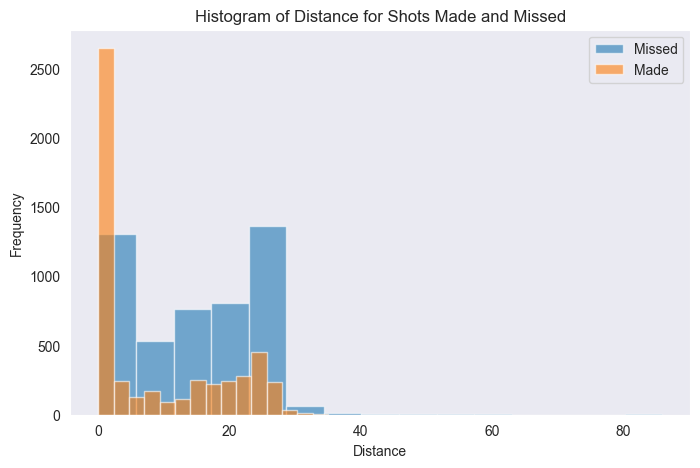

In [153]:
# Check if there is a relationship between distance and whether a shot is made
# based on plot we can see that the frequency of shots made is much higher when 
# the distance shorter compared to missed
sample_df = train_df[["SHOT_DISTANCE", "SHOT_MADE"]].iloc[:10000]
plt.figure(figsize=(8, 5))
sample_df[sample_df['SHOT_MADE'] == 0]['SHOT_DISTANCE'].hist(alpha=0.6, label='Missed', bins=15)
sample_df[sample_df['SHOT_MADE'] == 1]['SHOT_DISTANCE'].hist(alpha=0.6, label='Made', bins=15)
plt.title('Histogram of Distance for Shots Made and Missed')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

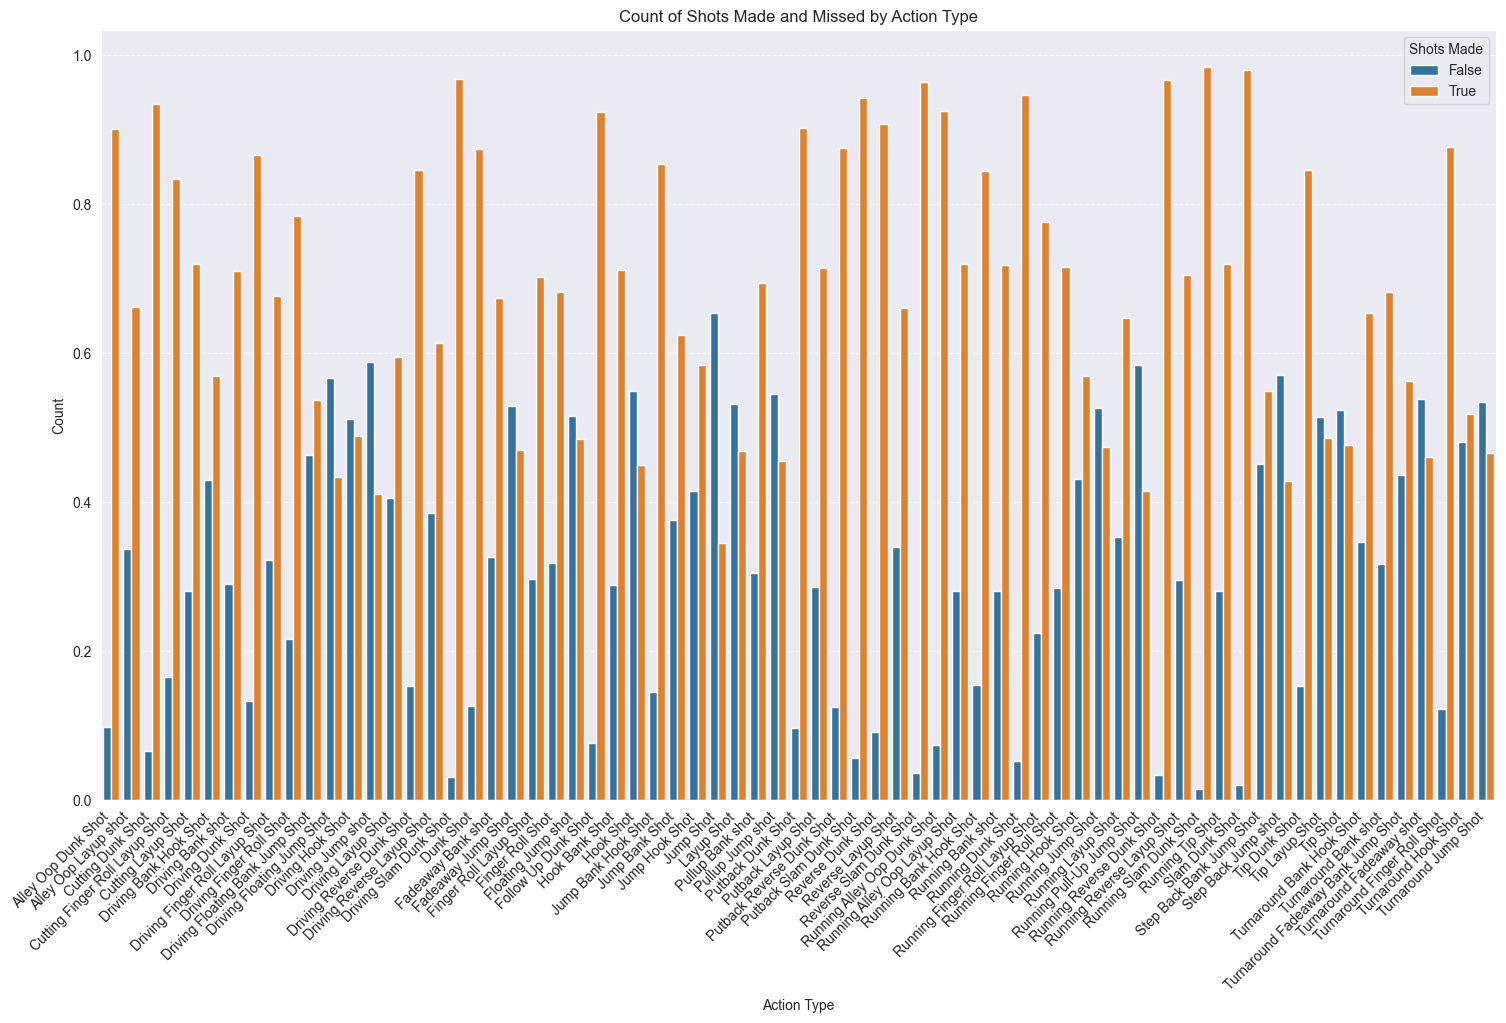

In [154]:
normalized_data = (
    df_shots_clean
    .groupby(['ACTION_TYPE', 'SHOT_MADE'])
    .size()
    .reset_index(name='count')
)
total_counts = normalized_data.groupby('ACTION_TYPE')['count'].transform('sum')
normalized_data['proportion'] = normalized_data['count'] / total_counts
plt.figure(figsize=(18, 10))
sns.barplot(
    data=normalized_data,
    x='ACTION_TYPE',
    y='proportion',
    hue='SHOT_MADE'
)
plt.title('Count of Shots Made and Missed by Action Type')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Shots Made')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model Choice
## Elastic Net Regression vs Deep Neural Network

The reason why we choose this model. It achieves similar accuracy scores and metrics compared to a deep neural network, therefore, we'll proceed with finetuning a Elastic Net Regression because it's more computationally less expensive to run. Here we plot different performance metrics for each model. It seems like the Elastic Net Regression is able to achieve better accuracy overall. It can generalize better the neural network. Based on the confustion matrix the neural network seems to be more bias towards predicting that a shot will not be a made.

In [155]:
# %%time
# if os.path.exists('preds_1.npy'):
#     preds = np.load('preds_1.npy')
# else:
#     best_model_1.fit(x_train_svd, y_train)
#     joblib.dump(best_model_1, 'best_model_1.joblib')
#     preds = best_model_1.predict(x_test_svd)
#     np.save('preds_1.npy', preds)
#     
# conf_matrix = confusion_matrix(y_test, preds)
# print(classification_report(y_test, preds))
# disp = ConfusionMatrixDisplay(conf_matrix)
# disp.plot()

              precision    recall  f1-score   support

           0       0.67      0.73      0.70    141152
           1       0.66      0.59      0.62    124174

    accuracy                           0.66    265326
   macro avg       0.66      0.66      0.66    265326
weighted avg       0.66      0.66      0.66    265326

CPU times: user 266 ms, sys: 17.9 ms, total: 284 ms
Wall time: 283 ms


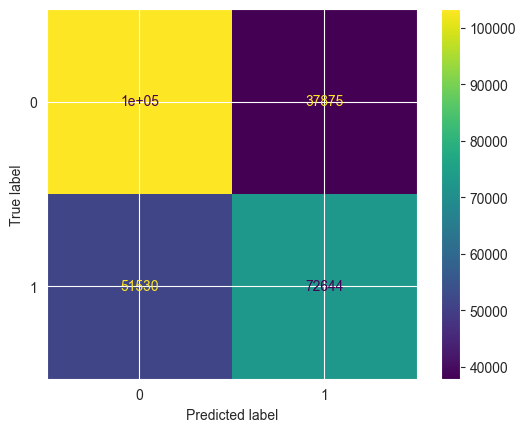

In [156]:
%%time

if os.path.exists('preds_2.npy'):
    preds = np.load('preds_2.npy')
else:
    best_model_2.fit(x_train_svd, y_train)
    joblib.dump(best_model_2, 'best_model_2.joblib')
    preds = best_model_2.predict(x_test_svd)
    np.save('preds_2.npy', preds)
    
conf_matrix = confusion_matrix(y_test, preds)
print(classification_report(y_test, preds))
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()



              precision    recall  f1-score   support

           0       0.60      0.96      0.74    141152
           1       0.86      0.26      0.40    124174

    accuracy                           0.63    265326
   macro avg       0.73      0.61      0.57    265326
weighted avg       0.72      0.63      0.58    265326


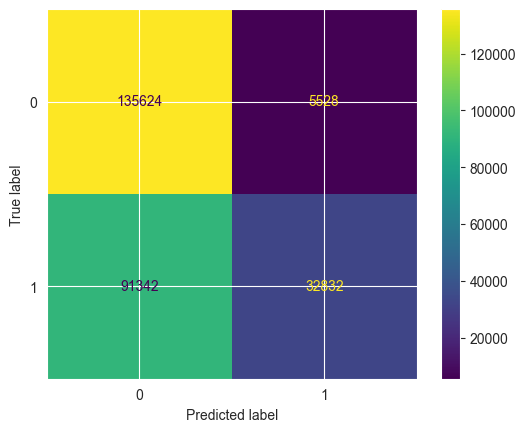

CPU times: user 2.64 s, sys: 622 ms, total: 3.26 s
Wall time: 4.16 s


In [181]:
%%time
# Load FNN Model with best weights
model = FNN(input_dim).to(device)
model.load_state_dict(torch.load("best_fnn_model.pth", weights_only=True))

predicted = []
model.eval()
y_true, y_pred = [], []

x_test_tensor = torch.from_numpy(x_test_svd.astype(np.float32)).to(device)
y_test_array = y_test.values 

batch_size = 64
for i in range(0, len(x_test_tensor), batch_size):
    x_batch = x_test_tensor[i:i + batch_size]
    y_batch = y_test_array[i:i + batch_size]
    with torch.no_grad():
        pred = model(x_batch)
        pred = (pred >= 0.5).float().cpu().numpy() 
        y_true.extend(y_batch)
        y_pred.extend(pred)

y_true = np.array(y_true)
y_pred = np.array(y_pred).flatten()

print(classification_report(y_true, y_pred))
conf_matrix = confusion_matrix(y_true, y_pred)

joblib.dump(conf_matrix, 'conf_matrix_fnn.joblib')

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()